### Research Questions

**RQ1:**  
*To what extent do OSS4SG and general OSS projects differ in terms of project characteristics and community dynamics?*

**RQ2:**  
*How stable are OSS4SG compared to OSS projects in terms of the influx of newcomers and the departure of contributors?*

**RQ3:**  
*How do contributors’ attraction and turnover evolve over time in OSS4SG projects compared to general OSS projects?*

### Data Collection Timeline

- **OSS and OSS4SG repository data collected on: July 10**
- **Contributor information scraped on: July 22**

### RQ1
*To what extent do OSS4SG and general OSS projects differ in terms of project characteristics and community dynamics?*


---
### Project Activity Analysis

**Definition of Inactive Projects**: A project is considered inactive if it has had no contributions for the past year.

---
### OSS4SG Project Status

- **Total Projects**: 424
  - **Active Projects**: 237 (55.9% of total)
  - **Inactive Projects**: 187 (44.1% of total)

### OSS Project Status

- **Total Projects**: 619
  - **Active Projects**: 164 (26.5% of total)
  - **Inactive Projects**: 455 (73.5% of total)

---
### Filtering Criteria Impact

#### Number of Projects Before and After Filtering

| Metric                      | Overall | OSS4SG | OSS |
|-----------------------------|---------|--------|-----|
| **Before Filtering**        | 1039    | 422    | 617 |
| **Contributors Removed**    | 517     | 122    | 395 |
| **Commits Removed**         | 131     | 37     | 94  |
| **Closed PRs Removed**      | 21      | 9      | 12  |
| **Inactivity Removed**      | 81      | 56     | 25  |
| **Short Lifespan Removed**  | 0       | 0      | 0   |
| **After Filtering**         | 289     | 198    | 91  |

### Key Takeaways

<div style="background-color:#f0f8ff; padding:10px; border-radius:5px;">
- <strong>OSS4SG</strong> shows a higher percentage of active projects (<strong>55.9%</strong>) compared to <strong>OSS</strong> (<strong>26.5%</strong>).
</div>

<div style="background-color:#f0f8ff; padding:10px; border-radius:5px;">
- <strong>OSS</strong> has a higher proportion of inactive projects (<strong>73.5%</strong>) compared to <strong>OSS4SG</strong> (<strong>44.1%</strong>).
</div>

<div style="background-color:#f0f8ff; padding:10px; border-radius:5px;">
- The filtering criteria reduced the number of projects from <strong>1039</strong> to <strong>289</strong> overall, ensuring a more focused and high-quality dataset.
</div>

---

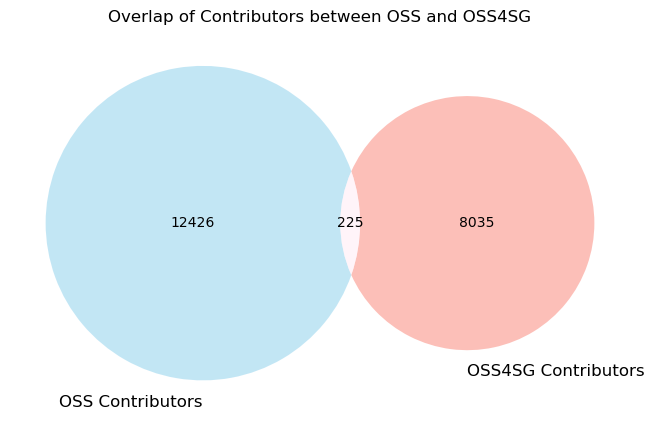

In [42]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Define the directories
base_dir = '/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets'
oss_dir = os.path.join(base_dir, 'oss_projects')
oss4sg_dir = os.path.join(base_dir, 'oss4sg_projects')

# Output directory for graphs
output_dir = '/Users/mohamadashraf/Desktop/Projects/Graphs/printed graphs/'

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def is_not_numeric(s):
    return not s.isdigit()

def process_contributors(directory):
    project_contributors = {}
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            project_name = os.path.splitext(filename)[0]
            try:
                df = pd.read_csv(file_path, header=None)
                users = df.iloc[:, 0].astype(str).dropna().tolist()
                filtered_users = [
                    user.strip() for user in users
                    if is_not_numeric(user)
                    and not re.match(r'Total\s+Users', user, re.IGNORECASE)
                    and user.lower() != 'user'
                ]
                project_contributors[project_name] = set(filtered_users)
            except pd.errors.EmptyDataError:
                print(f"No data in file: {filename}")
    return project_contributors

oss_project_contributors = process_contributors(oss_dir)
oss4sg_project_contributors = process_contributors(oss4sg_dir)

def build_contributor_projects_map(project_contributors):
    contributor_projects = {}
    for project, contributors in project_contributors.items():
        for contributor in contributors:
            contributor_projects.setdefault(contributor, set()).add(project)
    return contributor_projects

oss_contributor_projects = build_contributor_projects_map(oss_project_contributors)
oss4sg_contributor_projects = build_contributor_projects_map(oss4sg_project_contributors)

oss_counts_df = pd.DataFrame([
    (contributor, len(projects)) 
    for contributor, projects in oss_contributor_projects.items()
], columns=['Contributor', 'Projects Count'])

oss4sg_counts_df = pd.DataFrame([
    (contributor, len(projects)) 
    for contributor, projects in oss4sg_contributor_projects.items()
], columns=['Contributor', 'Projects Count'])

# Venn Diagram of Contributors Overlap
def plot_venn(contributors_oss, contributors_oss4sg, output_filename):
    plt.figure(figsize=(8, 8))
    venn2(subsets=(
        len(contributors_oss - contributors_oss4sg),
        len(contributors_oss4sg - contributors_oss),
        len(contributors_oss & contributors_oss4sg)
    ),
    set_labels=('OSS Contributors', 'OSS4SG Contributors'),
    set_colors=('skyblue', 'salmon'), alpha=0.5)
    plt.title('Overlap of Contributors between OSS and OSS4SG')
    
    # Save the plot as a high-resolution PDF
    plt.savefig(output_filename, format='pdf', dpi=300)
    plt.show()

# Generate the Venn diagram and save it as a PDF
plot_venn(
    set(oss_contributor_projects.keys()), 
    set(oss4sg_contributor_projects.keys()), 
    os.path.join(output_dir, 'venn_diagram.pdf')
)

# Function to calculate statistics
def get_statistics(df):
    total_contributors = len(df)
    contributors_more_than_one = df[df['Projects Count'] > 1].shape[0]
    percentage_more_than_one = (contributors_more_than_one / total_contributors) * 100 if total_contributors > 0 else 0
    average_projects = df['Projects Count'].mean()
    average_projects_more_than_one = df[df['Projects Count'] > 1]['Projects Count'].mean()
    return total_contributors, contributors_more_than_one, percentage_more_than_one, average_projects, average_projects_more_than_one

# OSS Statistics
total_oss_contributors, oss_contributors_more_than_one, oss_percentage_more_than_one, average_projects_per_contributor_oss, average_projects_more_than_one_oss = get_statistics(oss_counts_df)

# OSS4SG Statistics
total_oss4sg_contributors, oss4sg_contributors_more_than_one, oss4sg_percentage_more_than_one, average_projects_per_contributor_oss4sg, average_projects_more_than_one_oss4sg = get_statistics(oss4sg_counts_df)

# Calculate overlap
contributors_oss_in_oss4sg = set(oss_contributor_projects.keys()) & set(oss4sg_contributor_projects.keys())
contributors_oss4sg_in_oss = contributors_oss_in_oss4sg  # Same as intersection

count_contributors_oss_in_oss4sg = len(contributors_oss_in_oss4sg)
percentage_contributors_oss_in_oss4sg = (count_contributors_oss_in_oss4sg / total_oss_contributors) * 100 if total_oss_contributors > 0 else 0
percentage_contributors_oss4sg_in_oss = (count_contributors_oss_in_oss4sg / total_oss4sg_contributors) * 100 if total_oss4sg_contributors > 0 else 0

# Calculate exclusive contributors
exclusive_oss_contributors = set(oss_contributor_projects.keys()) - set(oss4sg_contributor_projects.keys())
exclusive_oss4sg_contributors = set(oss4sg_contributor_projects.keys()) - set(oss_contributor_projects.keys())

count_exclusive_oss = len(exclusive_oss_contributors)
percentage_exclusive_oss = (count_exclusive_oss / total_oss_contributors) * 100 if total_oss_contributors > 0 else 0

count_exclusive_oss4sg = len(exclusive_oss4sg_contributors)
percentage_exclusive_oss4sg = (count_exclusive_oss4sg / total_oss4sg_contributors) * 100 if total_oss4sg_contributors > 0 else 0


### Contributor cross pollination within OSS and OSS4SG respectively.

#### OSS and OSS4SG Statistics

| **Metric**                                                        | **OSS**          | **OSS4SG**        |
|-------------------------------------------------------------------|------------------|-------------------|
| **Total Contributors**                                            | 12,651           | 8,260             |
| **Contributors with More than One Project**                       | 305              | 575               |
| **Percentage of Contributors with More than One Project**         | 2.41%            | 6.96%             |
| **Average Projects per Contributor**                              | 1.03             | 1.09              |
| **Average Projects for Contributors with More than One Project**  | 2.19             | 2.31              |
| **Percentage of Contributors who Contributed to More than One Project across combined OSS and OSS4SG datasets** | 4.93%            | -                 |
| **Contributors who have projects in OSS4SG**                      | 225 (1.78%)      | -                 |
| **Contributors who have projects in OSS**                         | -                | 225 (2.72%)       |
| **Exclusive OSS Contributors**                                    | 12,426 (98.22%)  | -                 |
| **Exclusive OSS4SG Contributors**                                 | -                | 8,035 (97.28%)    |

---

#### Combined OSS and OSS4SG Statistics

| **Metric**                                      | **Combined**       |
|-------------------------------------------------|--------------------|
| **Total Unique Contributors**                   | 20,686             |
| **Contributors in Both OSS and OSS4SG**         | 225 (1.09%)        |


### Key Takeaway

<div style="background-color:#f0f8ff; padding:10px; border-radius:5px;">
  - The <strong>overall percentage of contributors involved in more than one project</strong> across combined OSS and OSS4SG datasets is <strong>4.93%</strong>. OSS4SG contributors generally tend to work on multiple projects, with their percentage above this average, while OSS contributors are below this average.
</div>

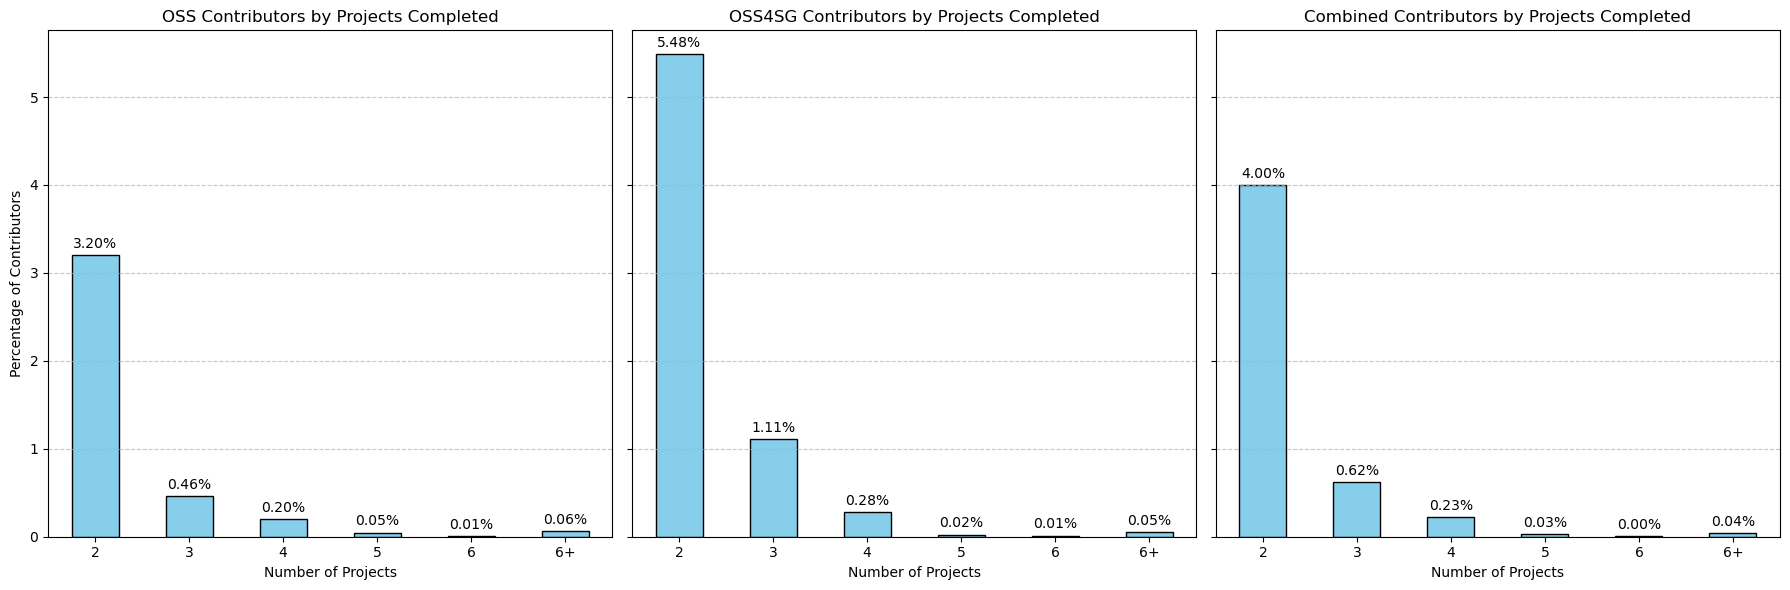

In [41]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

# Define the directories
base_dir = '/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets'
oss_dir = os.path.join(base_dir, 'oss_projects')
oss4sg_dir = os.path.join(base_dir, 'oss4sg_projects')

# Helper functions to process contributors
def is_not_numeric(s):
    return not s.isdigit()

def process_contributors(directory):
    project_contributors = {}
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            project_name = os.path.splitext(filename)[0]
            try:
                df = pd.read_csv(file_path, header=None)
                users = df.iloc[:, 0].astype(str).dropna().tolist()
                filtered_users = [
                    user.strip() for user in users
                    if is_not_numeric(user)
                    and not re.match(r'Total\s+Users', user, re.IGNORECASE)
                    and user.lower() != 'user'
                ]
                project_contributors[project_name] = set(filtered_users)
            except pd.errors.EmptyDataError:
                print(f"No data in file: {filename}")
    return project_contributors

def build_contributor_projects_map(project_contributors):
    contributor_projects = {}
    for project, contributors in project_contributors.items():
        for contributor in contributors:
            contributor_projects.setdefault(contributor, set()).add(project)
    return contributor_projects

# Process OSS and OSS4SG contributors
oss_project_contributors = process_contributors(oss_dir)
oss4sg_project_contributors = process_contributors(oss4sg_dir)

oss_contributor_projects = build_contributor_projects_map(oss_project_contributors)
oss4sg_contributor_projects = build_contributor_projects_map(oss4sg_project_contributors)

# Combine OSS and OSS4SG contributors
combined_contributor_projects = {**oss_contributor_projects}

for contributor, projects in oss4sg_contributor_projects.items():
    if contributor in combined_contributor_projects:
        combined_contributor_projects[contributor].update(projects)
    else:
        combined_contributor_projects[contributor] = projects

# Create DataFrames for each dataset
oss_counts_df = pd.DataFrame([(contributor, len(projects)) for contributor, projects in oss_contributor_projects.items()], columns=['Contributor', 'Projects Count'])
oss4sg_counts_df = pd.DataFrame([(contributor, len(projects)) for contributor, projects in oss4sg_contributor_projects.items()], columns=['Contributor', 'Projects Count'])
combined_counts_df = pd.DataFrame([(contributor, len(projects)) for contributor, projects in combined_contributor_projects.items()], columns=['Contributor', 'Projects Count'])

# Function to categorize project counts
def categorize_project_counts(df):
    def categorize(count):
        if count == 2:
            return '2'
        elif count == 3:
            return '3'
        elif count == 4:
            return '4'
        elif count == 5:
            return '5'
        elif count == 6:
            return '6'
        elif count > 6:
            return '6+'
        else:
            return None
    df['Categorized Project Count'] = df['Projects Count'].apply(categorize)
    return df.dropna(subset=['Categorized Project Count'])

# Get distributions
def get_project_count_distribution(df):
    categorized_df = categorize_project_counts(df)
    distribution = categorized_df['Categorized Project Count'].value_counts().sort_index(
        key=lambda x: x.map({'2': 2, '3': 3, '4': 4, '5':5, '6':6, '6+':7})
    )
    all_categories = ['2', '3', '4', '5', '6', '6+']
    return distribution.reindex(all_categories, fill_value=0)

oss_distribution = get_project_count_distribution(oss_counts_df)
oss4sg_distribution = get_project_count_distribution(oss4sg_counts_df)
combined_distribution = get_project_count_distribution(combined_counts_df)

# Normalize distributions
total_oss_contributors = len(oss_counts_df)
total_oss4sg_contributors = len(oss4sg_counts_df)
total_combined_contributors = len(combined_counts_df)

def normalize_distribution(distribution, total_contributors):
    return (distribution / total_contributors) * 100

oss_normalized_distribution = normalize_distribution(oss_distribution, total_oss_contributors)
oss4sg_normalized_distribution = normalize_distribution(oss4sg_distribution, total_oss4sg_contributors)
combined_normalized_distribution = normalize_distribution(combined_distribution, total_combined_contributors)

# Plot distributions side by side
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

plot_titles = ['OSS Contributors by Projects Completed', 'OSS4SG Contributors by Projects Completed', 'Combined Contributors by Projects Completed']
distributions = [oss_normalized_distribution, oss4sg_normalized_distribution, combined_normalized_distribution]

for ax, distribution, title in zip(axes, distributions, plot_titles):
    bars = distribution.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel('Number of Projects')
    ax.set_ylabel('Percentage of Contributors')
    ax.set_xticklabels(distribution.index, rotation=0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    for bar in bars.patches:
        ax.annotate(f'{bar.get_height():.2f}%', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

plt.tight_layout()
plt.show()


### Project Contribution Distribution for OSS, OSS4SG, and Combined

| **# Projects** | **OSS Count** | **OSS Percentage** | **OSS4SG Count** | **OSS4SG Percentage** | **Combined Count** | **Combined Percentage** |
|------------------------|---------------|---------------------|------------------|------------------------|---------------------|--------------------------|
| **2**                  | 405           | 3.20%              | 453              | 5.48%                 | 827                 | 4.00%                    |
| **3**                  | 58            | 0.46%              | 92               | 1.11%                 | 129                 | 0.62%                    |
| **4**                  | 25            | 0.20%              | 23               | 0.28%                 | 47                  | 0.23%                    |
| **5**                  | 6             | 0.05%              | 2                | 0.02%                 | 7                   | 0.03%                    |
| **6**                  | 1             | 0.01%              | 1                | 0.01%                 | 1                   | 0.00%                    |
| **6+**                | 8             | 0.06%              | 4                | 0.05%                 | 9                   | 0.04%                    |

### Key Takeaway

<span style="background-color:#f0f8ff; padding:5px; border-radius:5px;">
OSS4SG contributors tend to work on more than one project (5.48%) compared to OSS contributors (3.20%), showing higher multi-project engagement in OSS4SG.
</span>



The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


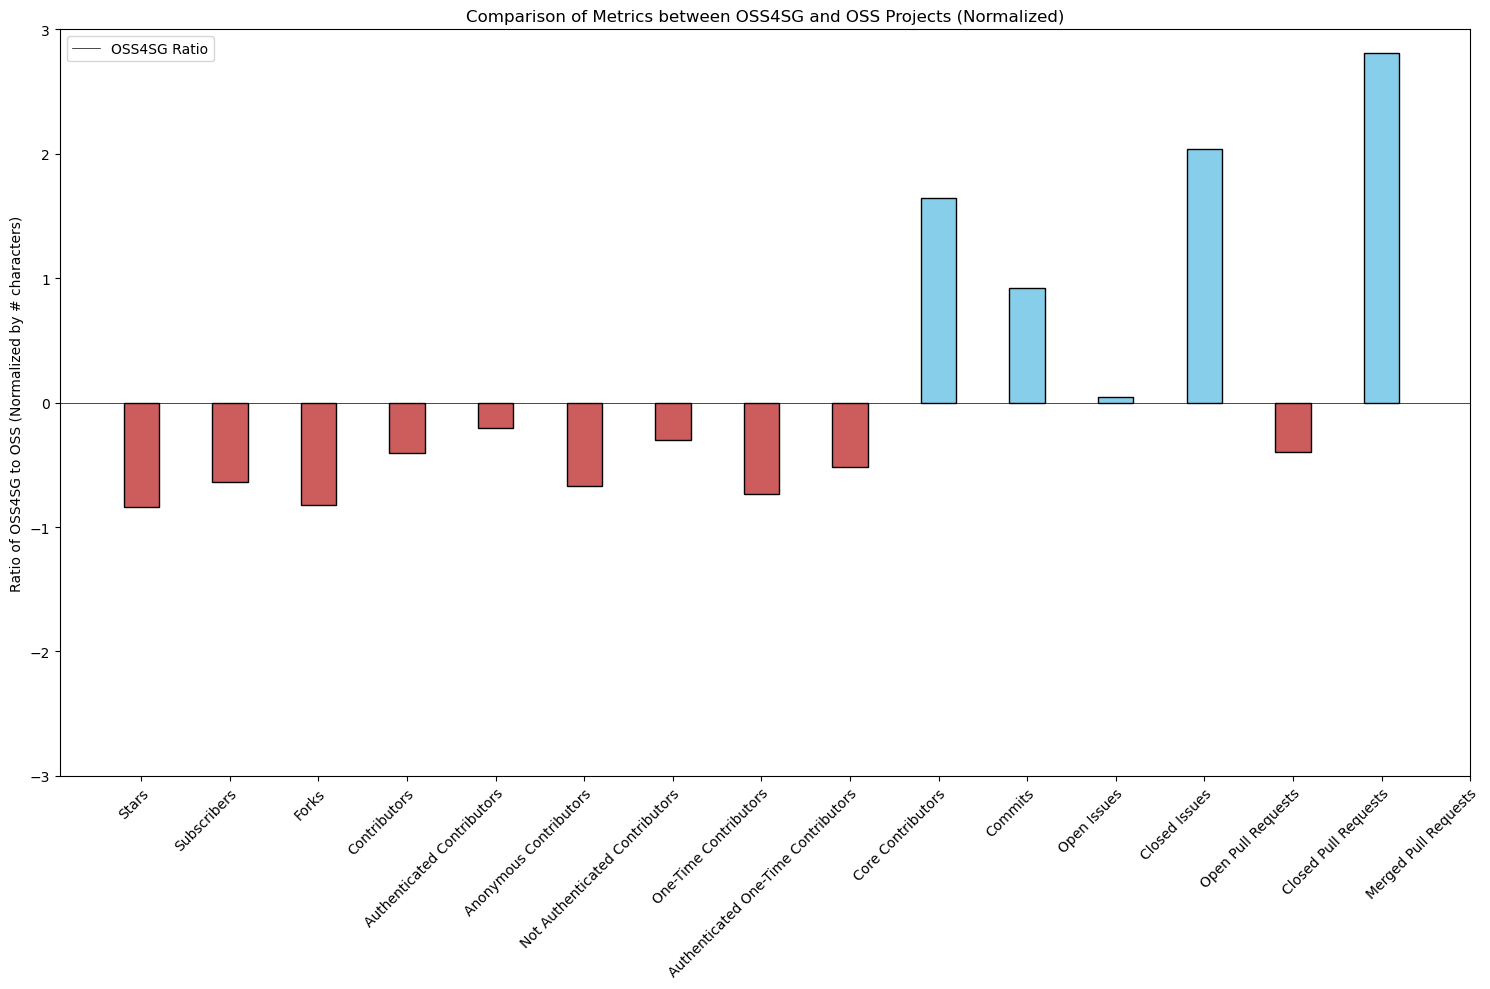

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the normalized datasets
oss4sg_df_normalized = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS4SG-Project-Info_normalized.csv')
oss_df_normalized = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS-Project-Info_normalized.csv')

# Add 'ProjectType' column
oss4sg_df_normalized['ProjectType'] = 'OSS4SG'
oss_df_normalized['ProjectType'] = 'OSS'

# Combine datasets
combined_df = pd.concat([oss4sg_df_normalized, oss_df_normalized], ignore_index=True)
combined_df.reset_index(drop=True, inplace=True)

# Calculate averages
metrics = ['numStars_normalized', 'numSubscribers_normalized', 'numForks_normalized', 'numContributors_normalized',
           'numAuthenticatedContributors_normalized', 'numAnonymousContributors_normalized',
           'numNotAuthenticatedContributors_normalized', 'numOneTimeContributors_normalized',
           'numAuthenticatedOneTimeContributors_normalized', 'numCoreContributors_normalized',
           'numCommits_normalized', 'numOpenIssues_normalized', 'numClosedIssues_normalized',
           'numOpenPullRequests_normalized', 'numClosedPullRequests_normalized', 'numMergedPullRequests_normalized']

avg_metrics = combined_df.groupby('ProjectType')[metrics].mean()

# Create summary table
summary_table = pd.DataFrame(avg_metrics.transpose())

# Calculate ratios (OSS4SG / OSS)
oss_values = summary_table['OSS']
oss4sg_values = summary_table['OSS4SG']
ratio_values = oss4sg_values / oss_values

# Adjust ratios by subtracting 1 to show percentage difference
adjusted_values = ratio_values - 1

# Aliases for plot labels
metric_aliases = [
    'Stars', 'Subscribers', 'Forks', 'Contributors', 'Authenticated Contributors', 'Anonymous Contributors',
    'Not Authenticated Contributors', 'One-Time Contributors', 'Authenticated One-Time Contributors',
    'Core Contributors', 'Commits', 'Open Issues', 'Closed Issues', 'Open Pull Requests', 
    'Closed Pull Requests', 'Merged Pull Requests'
]

# Prepare data for plotting
x = np.arange(len(metric_aliases))
width = 0.4  # Width of the bars

# Colors for positive and negative values
colors = ['indianred' if val < 0 else 'skyblue' for val in adjusted_values]

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot OSS4SG bars with colors based on positive or negative values
ax.bar(x, adjusted_values, width, color=colors, edgecolor='black')

# Configure plot
ax.set_xticks(x)
# Set skewed labels for better readability
ax.set_xticklabels(metric_aliases, rotation=45, ha='right', rotation_mode='anchor')
ax.axhline(0, color='black', linewidth=0.5)
ax.set_ylim(-3, 3)
ax.set_ylabel('Ratio of OSS4SG to OSS (Normalized by # characters)')
ax.set_title('Comparison of Metrics between OSS4SG and OSS Projects (Normalized)')
ax.legend(['OSS4SG Ratio'])

plt.tight_layout()
plt.show()

### Key Takeaway

<div style="background-color: #e6f7ff; padding: 10px; border-radius: 5px;">
<strong>OSS4SG projects appear more stable and attractive to consistent contributors, with a higher ratio of core contributors and fewer one-time contributors compared to OSS, along with a higher proportion of closed issues.</strong>
</div>

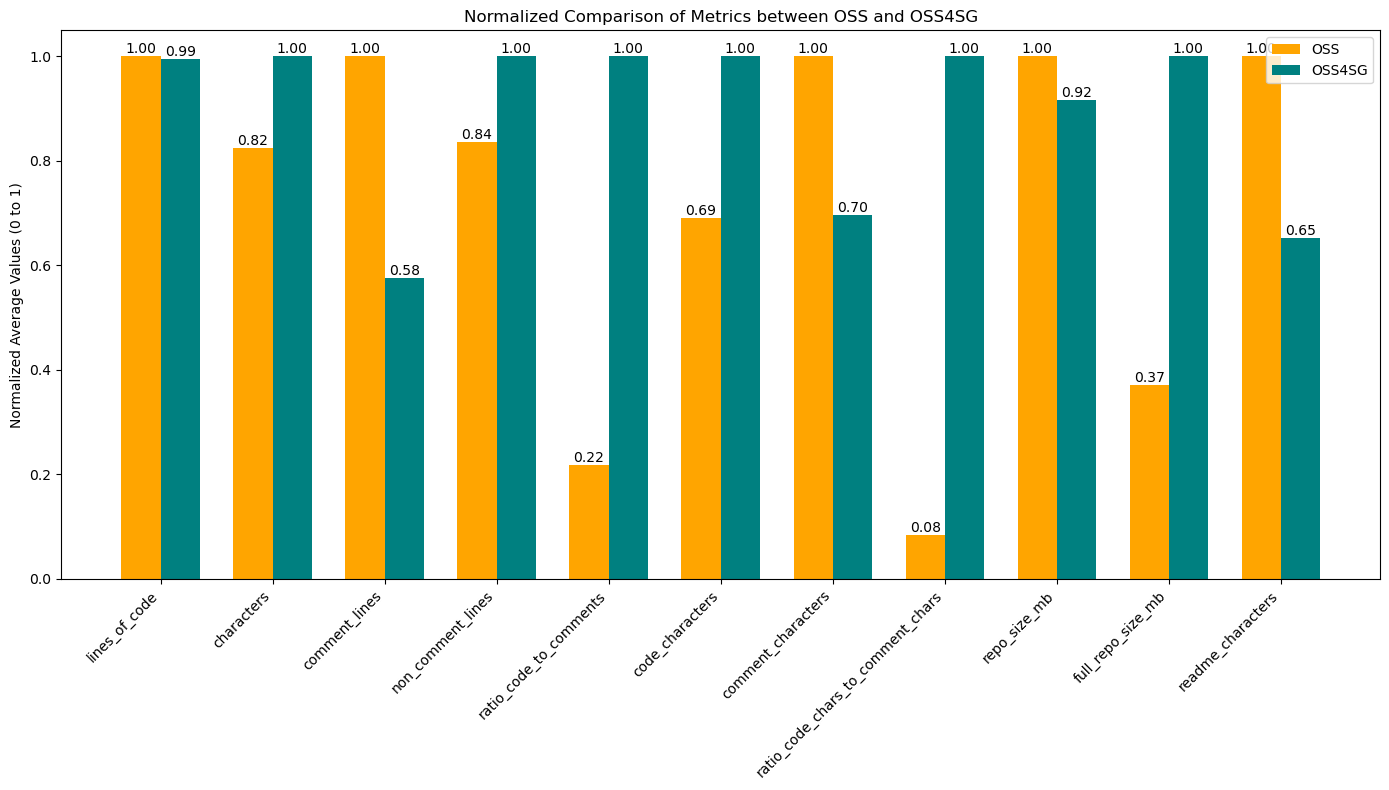

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the OSS4SG and OSS datasets
oss4sg_df = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS4SG-Project-Info_LOC_readme_only.csv')
oss_df = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS-Project-Info_LOC_readme_only.csv')

# Columns to analyze
metrics = ['lines_of_code', 'characters', 'comment_lines', 'non_comment_lines', 'ratio_code_to_comments',
           'code_characters', 'comment_characters', 'ratio_code_chars_to_comment_chars', 'repo_size_mb',
           'full_repo_size_mb', 'readme_characters']

# Convert columns to numeric, handle non-numeric values as NaN
oss4sg_df[metrics] = oss4sg_df[metrics].apply(pd.to_numeric, errors='coerce')
oss_df[metrics] = oss_df[metrics].apply(pd.to_numeric, errors='coerce')

# Replace infinite values with NaN, then drop rows where all metrics are NaN
oss4sg_df[metrics] = oss4sg_df[metrics].replace([np.inf, -np.inf], np.nan)
oss_df[metrics] = oss_df[metrics].replace([np.inf, -np.inf], np.nan)

# Drop rows where all values in metrics are NaN
oss4sg_df_clean = oss4sg_df.dropna(subset=metrics, how='all')
oss_df_clean = oss_df.dropna(subset=metrics, how='all')

# Calculate the average for each metric
avg_oss4sg = oss4sg_df_clean[metrics].mean()
avg_oss = oss_df_clean[metrics].mean()

# Filter out any metrics where the average is zero in both OSS and OSS4SG
non_zero_metrics = (avg_oss4sg != 0) | (avg_oss != 0)
avg_oss4sg = avg_oss4sg[non_zero_metrics]
avg_oss = avg_oss[non_zero_metrics]

# Normalize the averages by dividing by the maximum value for each metric across OSS and OSS4SG
combined_max = np.maximum(avg_oss4sg, avg_oss)
normalized_oss4sg = avg_oss4sg / combined_max
normalized_oss = avg_oss / combined_max

# Replace any remaining NaN values after normalization with zero
normalized_oss4sg = normalized_oss4sg.fillna(0)
normalized_oss = normalized_oss.fillna(0)

# Prepare data for plotting
labels = avg_oss.index  # Use only the metrics with non-zero averages
oss4sg_values = normalized_oss4sg.values
oss_values = normalized_oss.values

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Plotting OSS and OSS4SG bars
bars1 = ax.bar(x - width/2, oss_values, width, label='OSS', color='orange')
bars2 = ax.bar(x + width/2, oss4sg_values, width, label='OSS4SG', color='teal')

# Adding labels and title
ax.set_ylabel('Normalized Average Values (0 to 1)')
ax.set_title('Normalized Comparison of Metrics between OSS and OSS4SG')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

# Add text annotations for each bar
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:  # Only annotate non-zero values
            ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Key Takeaway

<div style="background-color: #e6f7ff; padding: 15px; border-radius: 5px; font-size: 16px; line-height: 1.5;">
<strong>OSS4SG projects generally have a lower number of comments compared to OSS, possibly due to higher turnover in OSS, making comments a higher priority for stability. OSS appears to be less stable internally compared to OSS4SG.</strong><br><br>

<strong>The ratio between code and comments is higher in OSS4SG, which could make these projects more readable.</strong><br><br>

<strong>OSS4SG projects tend to be nearly double the size of OSS projects in terms of repository size.</strong>
</div>

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohamadashraf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


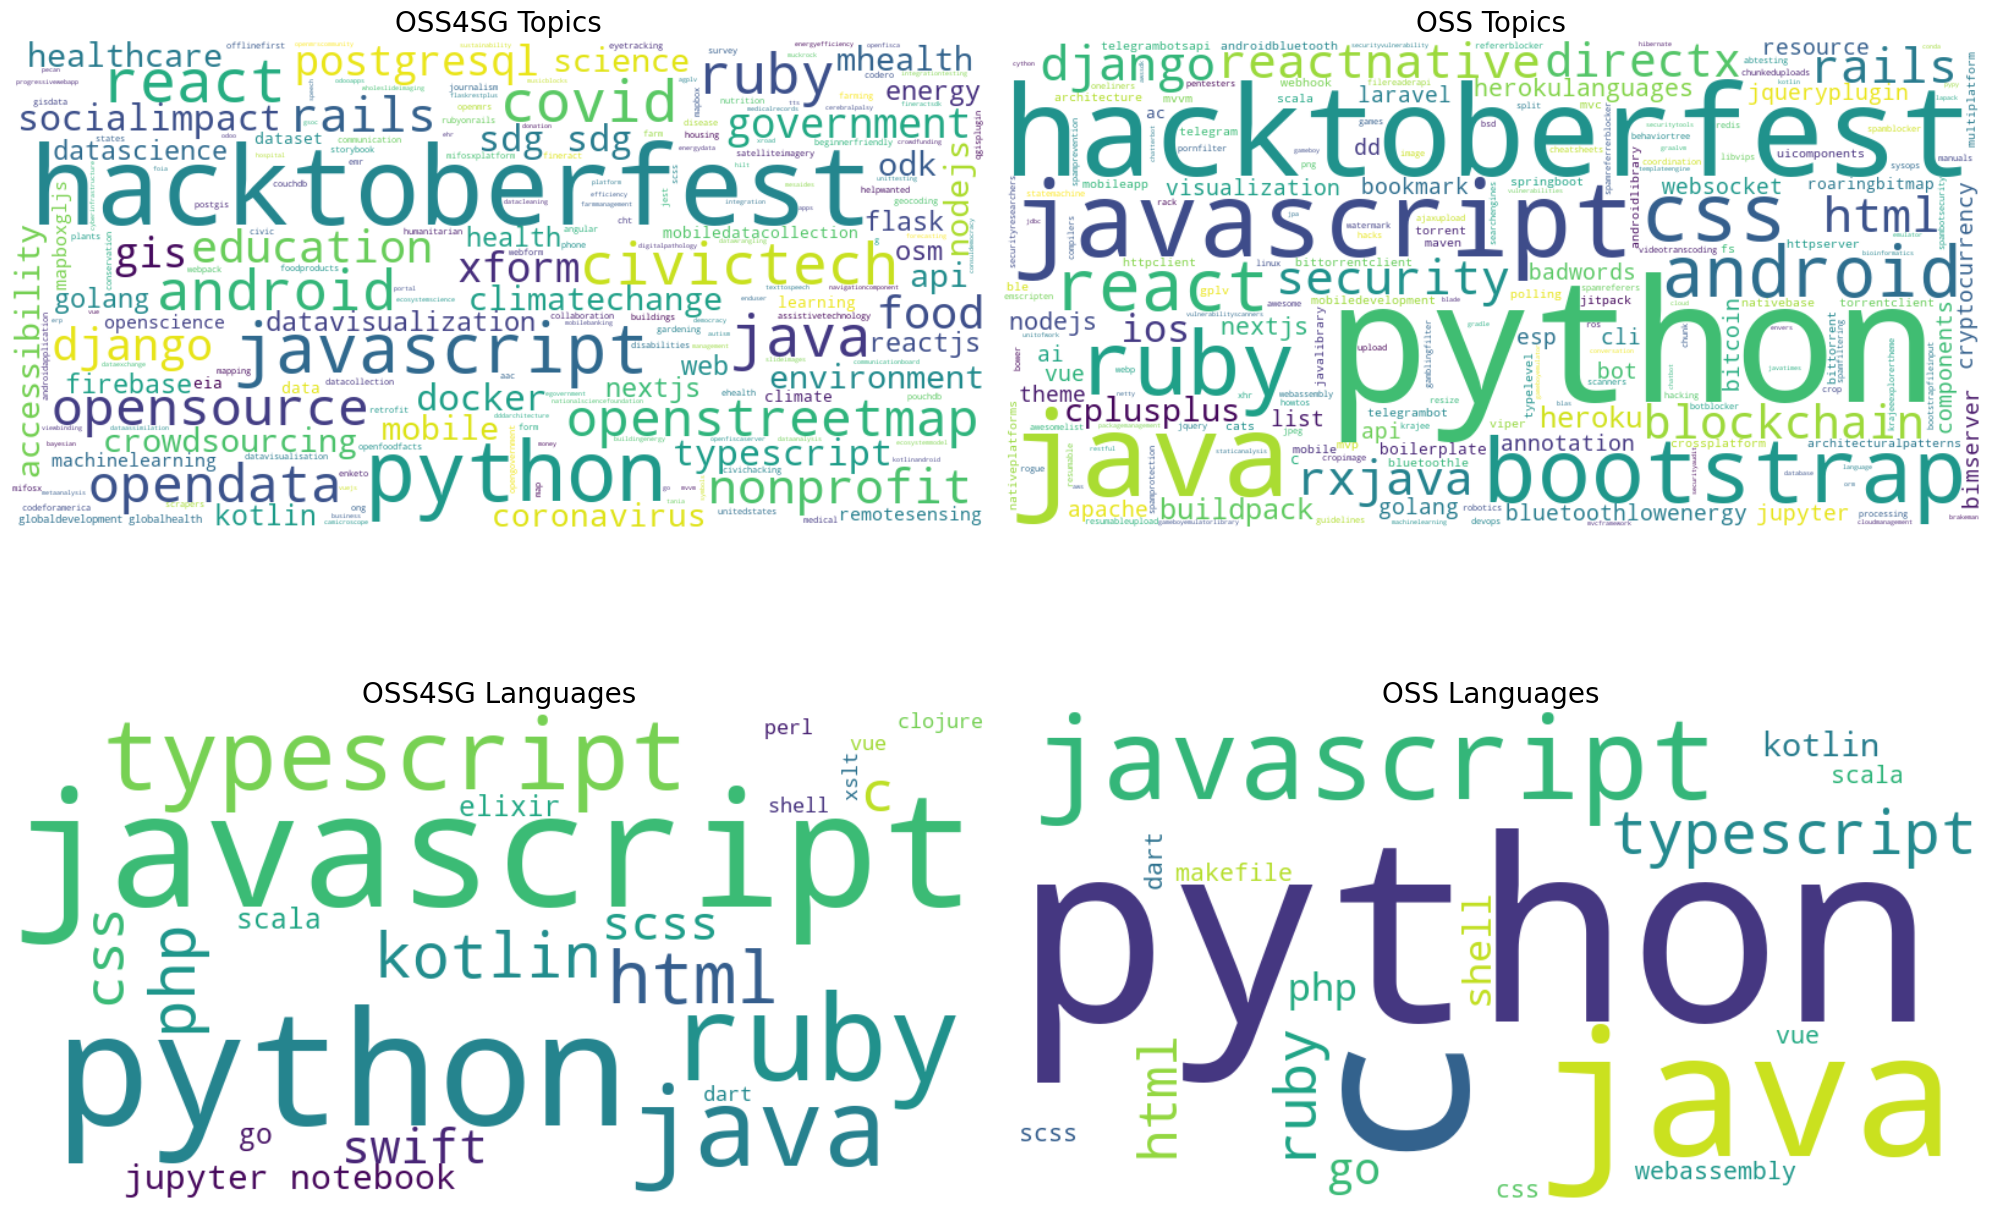

In [62]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load the datasets
# Replace the file paths with your actual file locations
oss4sg_df = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS4SG-Project-Info.csv')
oss_df = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS-Project-Info.csv')

# Add a 'ProjectType' column to distinguish between OSS and OSS4SG
oss4sg_df['ProjectType'] = 'OSS4SG'
oss_df['ProjectType'] = 'OSS'

# Combine datasets for comparison
combined_df = pd.concat([oss4sg_df, oss_df], ignore_index=True)
combined_df.reset_index(drop=True, inplace=True)

# Function to preprocess text
def preprocess_text(text_series):
    # Combine all text
    text = ' '.join(text_series.dropna().astype(str))
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)

# Preprocess topics and languages for both OSS4SG and OSS
oss4sg_topics_text = preprocess_text(oss4sg_df['topics'])
oss_topics_text = preprocess_text(oss_df['topics'])

oss4sg_languages_text = ' '.join(oss4sg_df['language'].dropna().astype(str).str.lower())
oss_languages_text = ' '.join(oss_df['language'].dropna().astype(str).str.lower())

# Generate word clouds
wordcloud_oss4sg_topics = WordCloud(width=800, height=400, background_color='white').generate(oss4sg_topics_text)
wordcloud_oss_topics = WordCloud(width=800, height=400, background_color='white').generate(oss_topics_text)

wordcloud_oss4sg_languages = WordCloud(width=800, height=400, background_color='white').generate(oss4sg_languages_text)
wordcloud_oss_languages = WordCloud(width=800, height=400, background_color='white').generate(oss_languages_text)

# Display the word clouds in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Plot OSS4SG topics
axs[0, 0].imshow(wordcloud_oss4sg_topics, interpolation='bilinear')
axs[0, 0].set_title('OSS4SG Topics', fontsize=20)
axs[0, 0].axis('off')

# Plot OSS topics
axs[0, 1].imshow(wordcloud_oss_topics, interpolation='bilinear')
axs[0, 1].set_title('OSS Topics', fontsize=20)
axs[0, 1].axis('off')

# Plot OSS4SG languages
axs[1, 0].imshow(wordcloud_oss4sg_languages, interpolation='bilinear')
axs[1, 0].set_title('OSS4SG Languages', fontsize=20)
axs[1, 0].axis('off')

# Plot OSS languages
axs[1, 1].imshow(wordcloud_oss_languages, interpolation='bilinear')
axs[1, 1].set_title('OSS Languages', fontsize=20)
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      1.00      0.97        16

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21



/var/folders/f9/zgk8jdl15h32ccr4fy4qxmvm0000gn/T/ipykernel_29512/3351029493.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


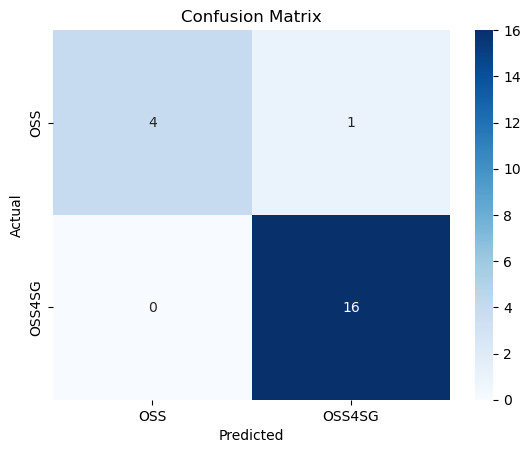

Feature Importance:


,Feature,Coefficient,Odds_Ratio
17,numMergedPullRequests,1.329816,3.780349
2,numStars,-1.017990,0.361320
14,numClosedIssues,0.909065,2.482000
3,numSubscribers,-0.826529,0.437565
8,numNotAuthenticatedContributors,-0.676678,0.508303
7,numAnonymousContributors,-0.676678,0.508303
16,numClosedPullRequests,0.602408,1.826512
15,numOpenPullRequests,-0.483140,0.616843
0,description_length,0.448928,1.566631
13,numOpenIssues,-0.380741,0.683355


In [65]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the normalized datasets
oss4sg_df = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS4SG-Project-Info_LOC_readme_only.csv')
oss_df = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS-Project-Info_LOC_readme_only.csv')

# Add 'ProjectType' column
oss4sg_df['ProjectType'] = 1  # OSS4SG projects labeled as 1
oss_df['ProjectType'] = 0     # OSS projects labeled as 0

# Combine datasets
combined_df = pd.concat([oss4sg_df, oss_df], ignore_index=True)
combined_df.reset_index(drop=True, inplace=True)

# Calculate description_length if not already calculated
combined_df['description_length'] = combined_df['description'].astype(str).apply(len)

# Combine both sets of metrics
metrics = [
    'description_length', 'lifespan', 'numStars', 'numSubscribers', 'numForks', 'numContributors',
    'numAuthenticatedContributors', 'numAnonymousContributors', 'numNotAuthenticatedContributors',
    'numOneTimeContributors', 'numAuthenticatedOneTimeContributors', 'numCoreContributors',
    'numCommits', 'numOpenIssues', 'numClosedIssues', 'numOpenPullRequests', 'numClosedPullRequests',
    'numMergedPullRequests', 'lines_of_code', 'characters', 'comment_lines', 'non_comment_lines', 
    'ratio_code_to_comments', 'code_characters', 'comment_characters', 'ratio_code_chars_to_comment_chars', 
    'repo_size_mb', 'full_repo_size_mb', 'readme_characters'
]

# Ensure all metrics are in the dataframe and convert them to numeric, handling non-numeric values
for metric in metrics:
    combined_df[metric] = pd.to_numeric(combined_df[metric], errors='coerce')

# Prepare the dataset
X = combined_df[metrics]
y = combined_df['ProjectType']

# Handle missing values by filling with zero (you can also consider dropping or imputing them)
X.fillna(0, inplace=True)

# Remove outliers using the IQR method
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

data = pd.concat([X, y], axis=1)
data_clean = remove_outliers(data)

# Separate features and target after cleaning
X_clean = data_clean[metrics]
y_clean = data_clean['ProjectType']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

# Fit the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Evaluate the model
y_pred = logreg.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['OSS', 'OSS4SG'], yticklabels=['OSS', 'OSS4SG'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance using coefficients
coefficients = pd.DataFrame({
    'Feature': metrics,
    'Coefficient': logreg.coef_[0]
})

# Calculate the odds ratios
coefficients['Odds_Ratio'] = np.exp(coefficients['Coefficient'])

# Calculate absolute coefficients for importance
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()

# Sort the coefficients by absolute value
coefficients.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)

print("Feature Importance:")
display(coefficients[['Feature', 'Coefficient', 'Odds_Ratio']])

### RQ2
*How stable are OSS4SG compared to OSS projects in terms of the influx of newcomers and the departure of contributors?*


### Keyword Definitions

**Attractive**: Projects with a high rate of new contributors joining and a low rate of contributors leaving. 
- **Location in Quadrant**: Top Left

**Unstable**: Projects where both the rates of new contributors joining and contributors leaving are high.
- **Location in Quadrant**: Top Right

**Stable**: Projects with low rates of both new contributors joining and contributors leaving.
- **Location in Quadrant**: Bottom Left

**Unattractive**: Projects with a low rate of new contributors joining and a high rate of contributors leaving.
- **Location in Quadrant**: Bottom Right

---

### Combined Keywords

**Magnetic**: Projects that have a high rate of new contributors joining. This category includes both attractive and unstable projects.
- **Relevant Quadrants**: Top Left and Top Right (Top section)

**Sticky**: Projects where the rate of contributors leaving is low. This category includes both attractive and stable projects.
- **Relevant Quadrants**: Top Left and Bottom Left (Left section)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to your CSV files
early_csv = '/Users/mohamadashraf/Downloads/OSS4SG_MSR-main-2/Datasets/GraphInfo/Join Rate vs Leave Rate for early stages.csv'
mid_csv = '/Users/mohamadashraf/Downloads/OSS4SG_MSR-main-2/Datasets/GraphInfo/Join Rate vs Leave Rate for mid stages.csv'
late_csv = '/Users/mohamadashraf/Downloads/OSS4SG_MSR-main-2/Datasets/GraphInfo/Join Rate vs Leave Rate for late stages.csv'

# Read the CSV files
df_early = pd.read_csv(early_csv)
df_mid = pd.read_csv(mid_csv)
df_late = pd.read_csv(late_csv)

# Add 'Stage' column
df_early['Stage'] = 'Early'
df_mid['Stage'] = 'Mid'
df_late['Stage'] = 'Late'

# Combine all dataframes
df_all = pd.concat([df_early, df_mid, df_late], ignore_index=True)

# Set up plotting style
sns.set_style("whitegrid")
sns.set_context("talk")

### Quadrant Definitions Based on Mean Rates Across All Stages

- **Join Rate Median**: 0.182
- **Leave Rate Median**: 0.164

### Context

The data presented reflects mean values across all stages of project development, which influence the definitions and distributions in the following categories:

| Category     | SG (Percentage [Count]) | Non SG (Percentage [Count]) |
|--------------|-------------------------|-----------------------------|
| Attractive   | 3.4% [5]                | 1.4% [1]                    |
| Unstable     | 33.8% [49]              | 74.0% [54]                  |
| Stable       | 60.0% [87]              | 21.9% [16]                  |
| Unattractive | 2.8% [4]                | 2.7% [2]                    |
| Sticky       | 63.4% [92]              | 23.3% [17]                  |
| Magnetic     | 37.2% [54]              | 75.4% [55]                  |

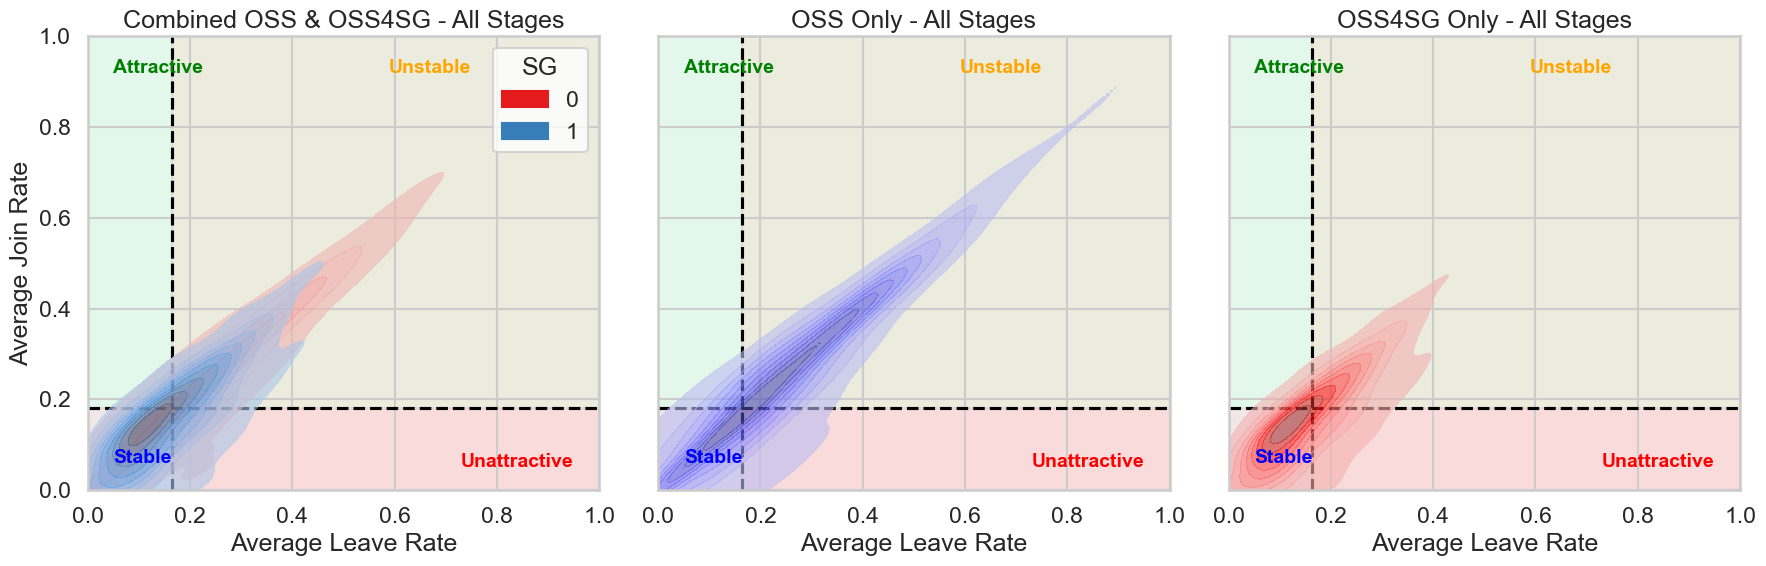

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the directories for saving the plot
output_dir = '/Users/mohamadashraf/Desktop/Projects/Graphs/printed graphs/'

# Define a color palette for SG (discrete colors)
sg_palette = sns.color_palette("Set1", 2)  # A better contrasting palette

# Define medians for the quadrants
join_rate_median = 0.182
leave_rate_median = 0.164

# Define function to add quadrant labels, light shaded areas, and median lines
def add_quadrant_labels_and_lines(ax, hide_legend=False):
    # Shaded areas for the quadrants with lighter colors
    ax.axvspan(0, leave_rate_median, color='lightblue', alpha=0.15, zorder=0)  # Stable
    ax.axvspan(leave_rate_median, 1, color='lightcoral', alpha=0.15, zorder=0)  # Unstable
    ax.axhspan(0, join_rate_median, color='lightcoral', alpha=0.15, zorder=0)  # Unattractive
    ax.axhspan(join_rate_median, 1, color='lightgreen', alpha=0.15, zorder=0)  # Attractive
    
    # Positioning labels in the corners
    ax.text(0.05, 0.95, 'Attractive', transform=ax.transAxes, fontsize=14, color='green', fontweight='bold', verticalalignment='top', fontname='Arial')
    ax.text(0.95, 0.05, 'Unattractive', transform=ax.transAxes, fontsize=14, color='red', fontweight='bold', horizontalalignment='right', fontname='Arial')
    ax.text(0.05, 0.05, 'Stable', transform=ax.transAxes, fontsize=14, color='blue', fontweight='bold', verticalalignment='bottom', fontname='Arial')
    ax.text(0.75, 0.95, 'Unstable', transform=ax.transAxes, fontsize=14, color='orange', fontweight='bold', horizontalalignment='right', verticalalignment='top')
    
    # Add median lines
    ax.axhline(join_rate_median, color='black', linestyle='--', zorder=1)
    ax.axvline(leave_rate_median, color='black', linestyle='--', zorder=1)
    
    # Optionally hide the legend
    if hide_legend and ax.get_legend() is not None:
        ax.get_legend().remove()

# All Stages Combined
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot combined data with KDE plots drawn above shaded regions
sns.kdeplot(
    data=df_all,
    x='Average Leave Rate',
    y='Average Join Rate',
    hue='SG',
    palette=sg_palette,  # Palette for combined plot (discrete colors)
    fill=True,
    alpha=0.6,
    thresh=0.05,
    levels=10,
    ax=axs[0],
    zorder=2  # Ensure KDE is drawn above shading
)
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[0].set_title('Combined OSS & OSS4SG - All Stages')
axs[0].set_xlabel('Average Leave Rate')
axs[0].set_ylabel('Average Join Rate')
add_quadrant_labels_and_lines(axs[0])

# Plot OSS only (assuming SG=0 in the dataset for OSS)
sns.kdeplot(
    data=df_all[df_all['SG'] == 0],
    x='Average Leave Rate',
    y='Average Join Rate',
    color='blue',
    fill=True,
    alpha=0.6,
    thresh=0.05,
    levels=10,
    ax=axs[1],
    zorder=2  # Ensure KDE is drawn above shading
)
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[1].set_title('OSS Only - All Stages')
axs[1].set_xlabel('Average Leave Rate')
add_quadrant_labels_and_lines(axs[1], hide_legend=True)

# Plot OSS4SG only (assuming SG=1 in the dataset for OSS4SG)
sns.kdeplot(
    data=df_all[df_all['SG'] == 1],
    x='Average Leave Rate',
    y='Average Join Rate',
    color='red',
    fill=True,
    alpha=0.6,
    thresh=0.05,
    levels=10,
    ax=axs[2],
    zorder=2  # Ensure KDE is drawn above shading
)
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)
axs[2].set_title('OSS4SG Only - All Stages')
axs[2].set_xlabel('Average Leave Rate')
add_quadrant_labels_and_lines(axs[2])

plt.tight_layout()

# Save the plot as a high-resolution PDF
plt.savefig(os.path.join(output_dir, 'kde_plots_with_light_shaded_quadrants.pdf'), format='pdf', dpi=300)

plt.show()

<div style="background-color: #e6f7ff; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong style="color: #333399;">OSS4SG projects demonstrate greater stability</strong> 
<span style="color: #000000;">with a higher concentration in the 'Stable' and 'Attractive' zones, as indicated by the lower average leave rates and balanced join rates, compared to general OSS projects.</span>
</div>

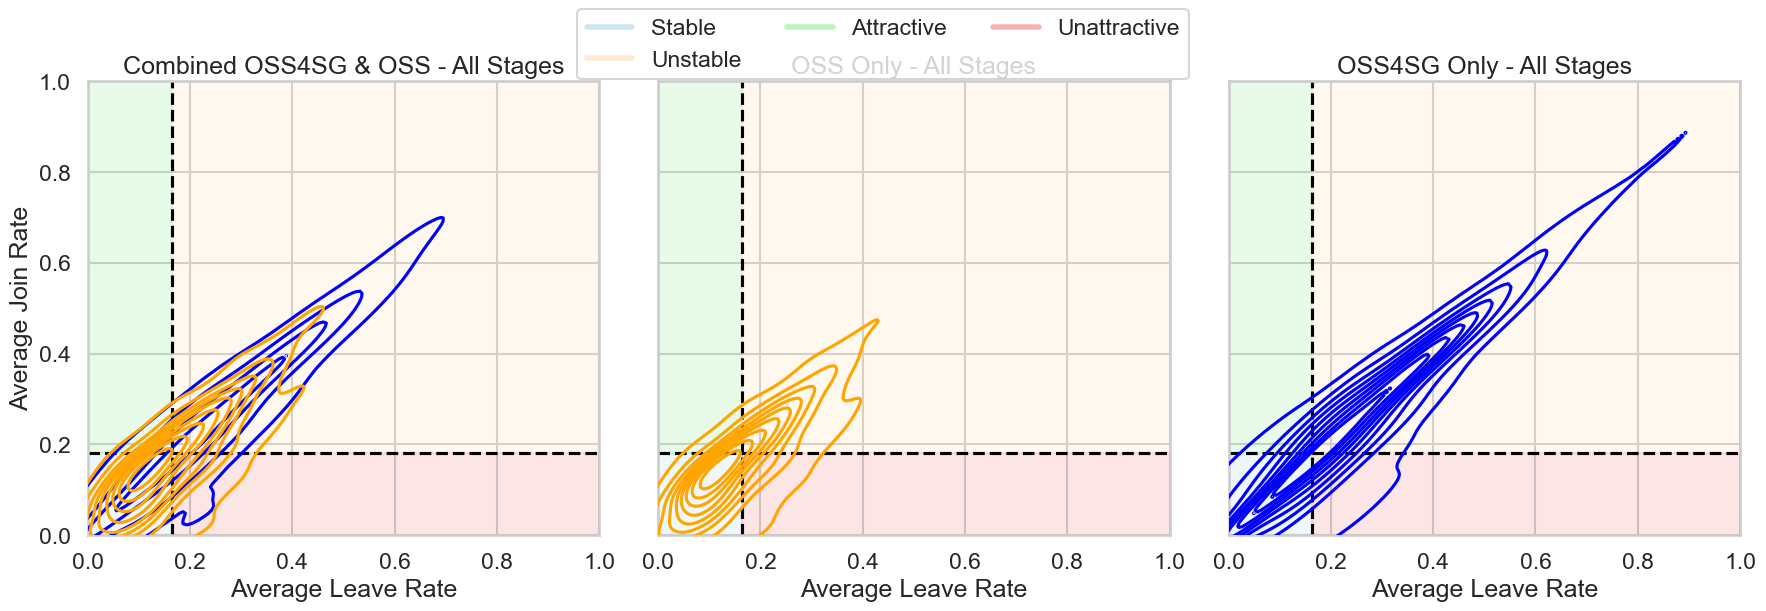

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.lines import Line2D

# Define the directories for saving the plot
output_dir = '/Users/mohamadashraf/Desktop/Projects/Graphs/printed graphs/'

# Define a color palette for SG (OSS4SG = blue, OSS = orange)
sg_palette = ['blue', 'orange']  # OSS4SG = blue, OSS = orange

# Define medians for the quadrants
join_rate_median = 0.182
leave_rate_median = 0.164

# Define function to add light quadrant blocks and median lines
def add_quadrant_blocks(ax):
    # Use very light pastel colors for the background blocks
    ax.axvspan(0, leave_rate_median, ymin=0, ymax=join_rate_median, color='lightblue', alpha=0.2, zorder=1)  # Stable
    ax.axvspan(0, leave_rate_median, ymin=join_rate_median, ymax=1, color='lightgreen', alpha=0.2, zorder=1)  # Attractive
    ax.axvspan(leave_rate_median, 1, ymin=0, ymax=join_rate_median, color='lightcoral', alpha=0.2, zorder=1)  # Unattractive
    ax.axvspan(leave_rate_median, 1, ymin=join_rate_median, ymax=1, color='navajowhite', alpha=0.2, zorder=1)  # Unstable
    
    # Add median lines
    ax.axhline(join_rate_median, color='black', linestyle='--', zorder=2)
    ax.axvline(leave_rate_median, color='black', linestyle='--', zorder=2)

# All Stages Combined
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define custom legend elements for the quadrants
legend_elements = [
    Line2D([0], [0], color='lightblue', lw=4, label='Stable', alpha=0.6),
    Line2D([0], [0], color='navajowhite', lw=4, label='Unstable', alpha=0.6),
    Line2D([0], [0], color='lightgreen', lw=4, label='Attractive', alpha=0.6),
    Line2D([0], [0], color='lightcoral', lw=4, label='Unattractive', alpha=0.6),
]

# Plot combined data without the legend
sns.kdeplot(
    data=df_all,
    x='Average Leave Rate',
    y='Average Join Rate',
    hue='SG',
    palette=sg_palette,  # Palette for combined plot (OSS4SG = blue, OSS = orange)
    fill=False,  # Disable transparency to make the plot more solid
    alpha=1.0,  # Solid color with full opacity
    thresh=0.05,
    levels=10,
    ax=axs[0],
    zorder=3  # Ensure KDE is drawn above shading
)
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[0].set_title('Combined OSS4SG & OSS - All Stages')
axs[0].set_xlabel('Average Leave Rate')
axs[0].set_ylabel('Average Join Rate')
add_quadrant_blocks(axs[0])
axs[0].get_legend().remove()  # Remove the legend for the combined plot

# Plot OSS only (assuming SG=1 in the dataset for OSS)
sns.kdeplot(
    data=df_all[df_all['SG'] == 1],
    x='Average Leave Rate',
    y='Average Join Rate',
    color='orange',  # OSS = orange
    fill=False,  # Solid color for OSS plot
    alpha=1.0,  # Solid color
    thresh=0.05,
    levels=10,
    ax=axs[1],
    zorder=3  # Ensure KDE is drawn above shading
)
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[1].set_title('OSS Only - All Stages')
axs[1].set_xlabel('Average Leave Rate')
add_quadrant_blocks(axs[1])

# Plot OSS4SG only (assuming SG=0 in the dataset for OSS4SG)
sns.kdeplot(
    data=df_all[df_all['SG'] == 0],
    x='Average Leave Rate',
    y='Average Join Rate',
    color='blue',  # OSS4SG = blue
    fill=False,  # Solid color for OSS4SG plot
    alpha=1.0,  # Solid color
    thresh=0.05,
    levels=10,
    ax=axs[2],
    zorder=3  # Ensure KDE is drawn above shading
)
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)
axs[2].set_title('OSS4SG Only - All Stages')
axs[2].set_xlabel('Average Leave Rate')
add_quadrant_blocks(axs[2])

# Add the legend to the figure (custom for the quadrants and OSS/OSS4SG distinction)
fig.legend(handles=legend_elements + axs[1].get_legend_handles_labels()[0],
           labels=['Stable', 'Unstable', 'Attractive', 'Unattractive', 'OSS4SG', 'OSS'],
           loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)

plt.tight_layout()

# Save the plot as a high-resolution PDF
plt.savefig(os.path.join(output_dir, 'kde_plots_with_light_quadrant_blocks.pdf'), format='pdf', dpi=300)

plt.show()


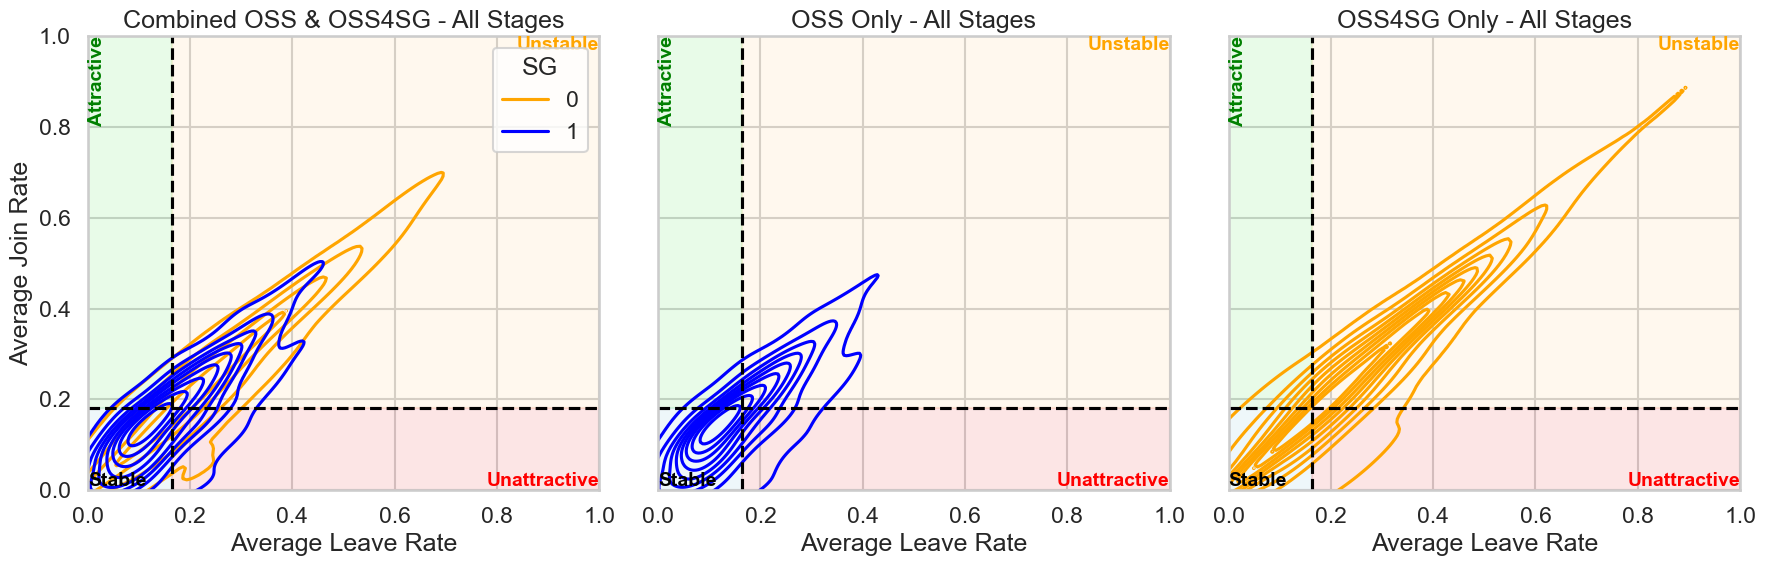

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the directories for saving the plot
output_dir = '/Users/mohamadashraf/Desktop/Projects/Graphs/printed graphs/'

# Define a color palette (OSS = blue, OSS4SG = orange)
sg_palette = ['orange', 'blue']  # OSS = blue, OSS4SG = orange

# Define medians for the quadrants
join_rate_median = 0.182
leave_rate_median = 0.164

# Define function to add quadrant labels and median lines
def add_quadrant_labels_and_lines(ax):
    # Light background shading for the quadrants
    ax.axvspan(0, leave_rate_median, ymin=0, ymax=join_rate_median, color='lightblue', alpha=0.2)  # Stable
    ax.axvspan(0, leave_rate_median, ymin=join_rate_median, ymax=1, color='lightgreen', alpha=0.2)  # Attractive
    ax.axvspan(leave_rate_median, 1, ymin=0, ymax=join_rate_median, color='lightcoral', alpha=0.2)  # Unattractive
    ax.axvspan(leave_rate_median, 1, ymin=join_rate_median, ymax=1, color='navajowhite', alpha=0.2)  # Unstable
    
    # Add median lines
    ax.axhline(join_rate_median, color='black', linestyle='--')
    ax.axvline(leave_rate_median, color='black', linestyle='--')

    # Adding labels to each quadrant based on exact corner positions
    ax.text(0, 1, 'Attractive', transform=ax.transAxes, fontsize=14, color='green', fontweight='bold', verticalalignment='top', horizontalalignment='left', rotation=90, fontname='Arial')
    ax.text(1, 1, 'Unstable', transform=ax.transAxes, fontsize=14, color='orange', fontweight='bold', verticalalignment='top', horizontalalignment='right', fontname='Arial')
    ax.text(0, 0, 'Stable', transform=ax.transAxes, fontsize=14, color='black', fontweight='bold', verticalalignment='bottom', horizontalalignment='left', fontname='Arial')
    ax.text(1, 0, 'Unattractive', transform=ax.transAxes, fontsize=14, color='red', fontweight='bold', verticalalignment='bottom', horizontalalignment='right', fontname='Arial')

# All Stages Combined
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot combined data without the legend
sns.kdeplot(
    data=df_all,
    x='Average Leave Rate',
    y='Average Join Rate',
    hue='SG',
    palette=sg_palette,  # Palette for combined plot (OSS = orange, OSS4SG = blue)
    fill=False,  # Solid color
    alpha=1.0,  # Solid color with full opacity
    thresh=0.05,
    levels=10,
    ax=axs[0]
)
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[0].set_title('Combined OSS & OSS4SG - All Stages')
axs[0].set_xlabel('Average Leave Rate')
axs[0].set_ylabel('Average Join Rate')
add_quadrant_labels_and_lines(axs[0])

# Plot OSS only
sns.kdeplot(
    data=df_all[df_all['SG'] == 1],
    x='Average Leave Rate',
    y='Average Join Rate',
    color='blue',  # OSS = blue now
    fill=False,  # Solid color for OSS plot
    alpha=1.0,  # Solid color
    thresh=0.05,
    levels=10,
    ax=axs[1]
)
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[1].set_title('OSS Only - All Stages')
axs[1].set_xlabel('Average Leave Rate')
add_quadrant_labels_and_lines(axs[1])

# Plot OSS4SG only
sns.kdeplot(
    data=df_all[df_all['SG'] == 0],
    x='Average Leave Rate',
    y='Average Join Rate',
    color='orange',  # OSS4SG = orange now
    fill=False,  # Solid color for OSS4SG plot
    alpha=1.0,  # Solid color
    thresh=0.05,
    levels=10,
    ax=axs[2]
)
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)
axs[2].set_title('OSS4SG Only - All Stages')
axs[2].set_xlabel('Average Leave Rate')
add_quadrant_labels_and_lines(axs[2])

plt.tight_layout()

# Save the plot as a high-resolution PDF
plt.savefig(os.path.join(output_dir, 'kde_plots_with_switched_colors.pdf'), format='pdf', dpi=300)

plt.show()


### Project Lifecycle Stages

1. **Early Stage**
   - **Duration**: Up to 7.4 years
   - **Characteristics**: This initial phase is foundational, focusing on the development of core software structures and functionalities. It involves making critical design decisions that lay the groundwork for future development.

2. **Middle Stage**
   - **Duration**: From 7.4 years to 9.1 years
   - **Characteristics**: During this phase, the project shifts towards scaling operations and optimizing existing features. It addresses the complexities and challenges that emerge as the project grows, including the management of accumulating technical debt.

3. **Late Stage**
   - **Duration**: From 9.1 years to 10.9 years and beyond
   - **Characteristics**: This final phase deals with matured software systems. Projects typically engage in major refactoring efforts to resolve entrenched design issues, enhance maintainability, and adapt the system for future expansions or integrations.

### Project Stage Details

| Stage      | Time Period  | Duration    | Num Windows | Number of Repos with Stage | Number of SG Repos with Stage | Number of Non SG Repos with Stage |
|------------|--------------|-------------|-------------|----------------------------|-------------------------------|-----------------------------------|
| Early Stage| 0 - 7.421    | 7.421 years | 29          | 218                        | 145                           | 73                                |
| Mid Stage  | 7.421 - 9.115| 1.694 years | 6           | 146                        | 91                            | 55                                |
| Late Stage | 9.115 - 10.923| 1.808 years| 7           | 74                         | 39                            | 35                                |

### Quadrant Definitions Based on Median Rates for Early Stage

- **Join Rate Median**: 0.189
- **Leave Rate Median**: 0.168

### Category Distribution Across SG and Non-SG Projects in Early Stage

| Category     | SG (Percentage [Count]) | Non SG (Percentage [Count]) |
|--------------|-------------------------|-----------------------------|
| Attractive   | 5.5% [8]                | 0.0% [0]                    |
| Unstable     | 32.4% [47]              | 74.0% [54]                  |
| Stable       | 59.3% [86]              | 20.5% [15]                  |
| Unattractive | 2.8% [4]                | 5.5% [4]                    |
| Sticky       | 64.8% [94]              | 20.5% [15]                  |
| Magnetic     | 37.9% [55]              | 74.0% [54]                  |

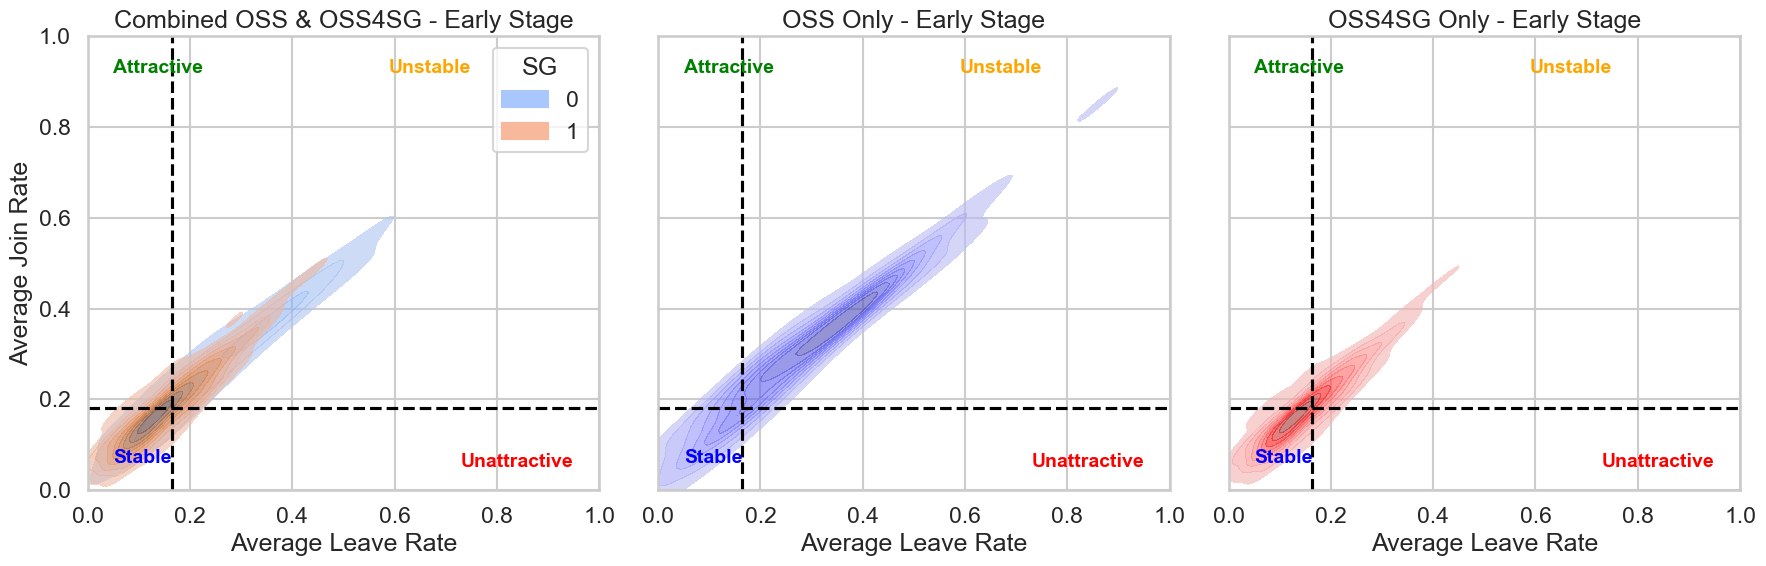

In [49]:
# Early Stage Plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Combined Data
sns.kdeplot(
    data=df_early,
    x='Average Leave Rate',
    y='Average Join Rate',
    hue='SG',
    palette=sg_palette,
    fill=True,
    alpha=0.6,
    thresh=0.05,
    levels=10,
    ax=axs[0]
)
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[0].set_title('Combined OSS & OSS4SG - Early Stage')
axs[0].set_xlabel('Average Leave Rate')
axs[0].set_ylabel('Average Join Rate')
add_quadrant_labels_and_lines(axs[0])

# OSS Only
sns.kdeplot(
    data=df_early[df_early['SG'] == 0],
    x='Average Leave Rate',
    y='Average Join Rate',
    color='blue',
    fill=True,
    alpha=0.6,
    thresh=0.05,
    levels=10,
    ax=axs[1]
)
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[1].set_title('OSS Only - Early Stage')
axs[1].set_xlabel('Average Leave Rate')
add_quadrant_labels_and_lines(axs[1], hide_legend=True)

# OSS4SG Only
sns.kdeplot(
    data=df_early[df_early['SG'] == 1],
    x='Average Leave Rate',
    y='Average Join Rate',
    color='red',
    fill=True,
    alpha=0.6,
    thresh=0.05,
    levels=10,
    ax=axs[2]
)
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)
axs[2].set_title('OSS4SG Only - Early Stage')
axs[2].set_xlabel('Average Leave Rate')
add_quadrant_labels_and_lines(axs[2])

plt.tight_layout()
plt.show()

### Key Takeaway

<div style="background-color: #e6f7ff; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong style="color: #333399;">In the early stages, OSS4SG projects show higher stability while OSS is very unstable </strong> 
<span style="color: #000000;">with lower average leave rates and a concentration in the 'Stable' zone, indicating stronger early-stage retention compared to OSS projects.</span>
</div>

### Quadrant Definitions Based on Mid Stage

- **Join Rate Median**: 0.125
- **Leave Rate Median**: 0.139

### Category Distribution Across SG and Non-SG Projects

| Category     | SG (Percentage [Count]) | Non SG (Percentage [Count]) |
|--------------|-------------------------|-----------------------------|
| Attractive   | 12.1% [11]              | 9.1% [5]                    |
| Unstable     | 30.8% [28]              | 52.7% [29]                  |
| Stable       | 44.0% [40]              | 30.9% [17]                  |
| Unattractive | 13.2% [12]              | 7.3% [4]                    |
| Sticky       | 56.1% [51]              | 40.0% [22]                  |
| Magnetic     | 42.9% [39]              | 61.8% [34]                  |

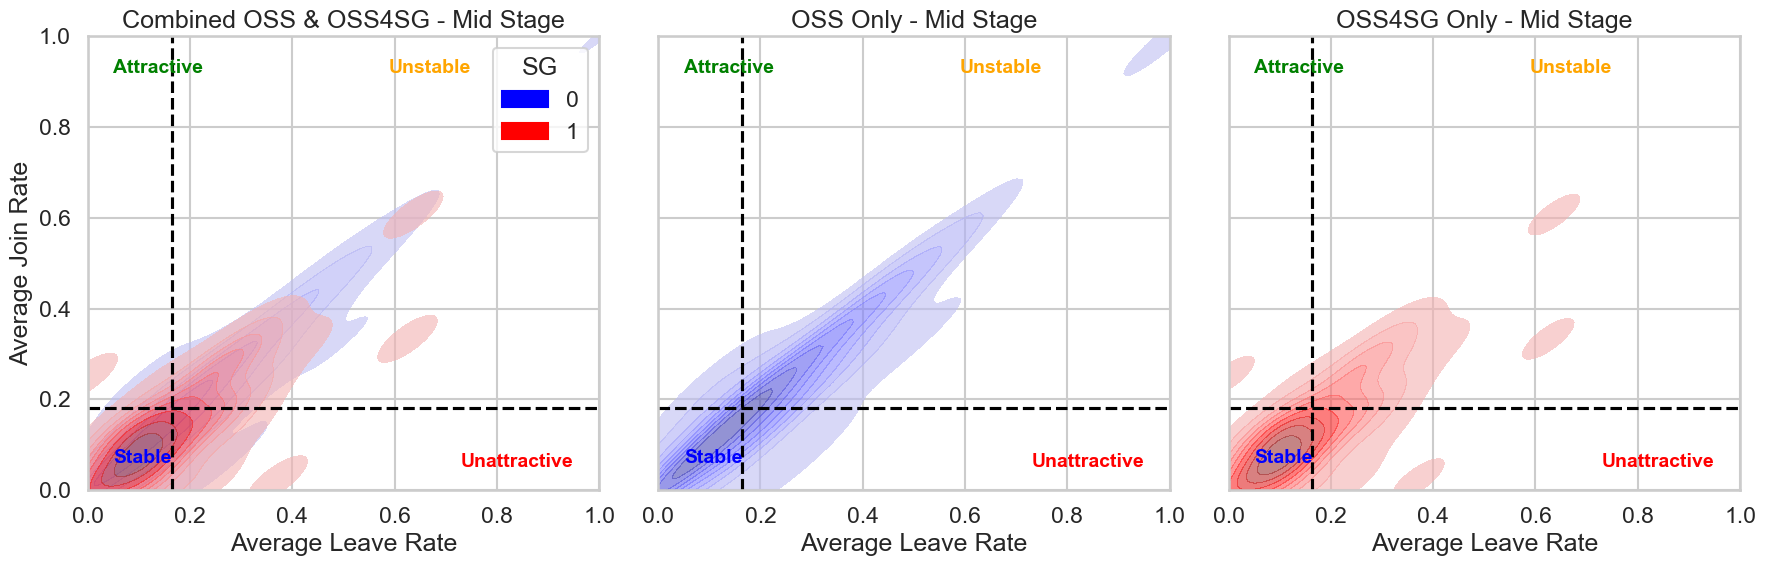

In [61]:
# Mid Stage Plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Combined Data
sns.kdeplot(
    data=df_mid,
    x='Average Leave Rate',
    y='Average Join Rate',
    hue='SG',
    palette=sg_palette,
    fill=True,
    alpha=0.6,
    thresh=0.05,
    levels=10,
    ax=axs[0]
)
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[0].set_title('Combined OSS & OSS4SG - Mid Stage')
axs[0].set_xlabel('Average Leave Rate')
axs[0].set_ylabel('Average Join Rate')
add_quadrant_labels_and_lines(axs[0])

# OSS Only
sns.kdeplot(
    data=df_mid[df_mid['SG'] == 0],
    x='Average Leave Rate',
    y='Average Join Rate',
    color='blue',
    fill=True,
    alpha=0.6,
    thresh=0.05,
    levels=10,
    ax=axs[1]
)
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[1].set_title('OSS Only - Mid Stage')
axs[1].set_xlabel('Average Leave Rate')
add_quadrant_labels_and_lines(axs[1], hide_legend=True)

# OSS4SG Only
sns.kdeplot(
    data=df_mid[df_mid['SG'] == 1],
    x='Average Leave Rate',
    y='Average Join Rate',
    color='red',
    fill=True,
    alpha=0.6,
    thresh=0.05,
    levels=10,
    ax=axs[2]
)
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)
axs[2].set_title('OSS4SG Only - Mid Stage')
axs[2].set_xlabel('Average Leave Rate')
add_quadrant_labels_and_lines(axs[2])

plt.tight_layout()
plt.show()

### Key Takeaway

<div style="background-color: #e6f7ff; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong style="color: #333399;">In the mid stages, OSS4SG projects maintain higher stability</strong> 
<span style="color: #000000;">with a low average leave rate and a distinct presence in the 'Stable' zone, suggesting sustained contributor retention compared to OSS projects.</span>
</div>

### Quadrant Definitions Based on Median Rates for Late Stage

- **Join Rate Median**: 0.137
- **Leave Rate Median**: 0.171

### Category Distribution Across SG and Non-SG Projects in Late Stage

| Category     | SG (Percentage [Count]) | Non SG (Percentage [Count]) |
|--------------|-------------------------|-----------------------------|
| Attractive   | 12.8% [5]               | 2.9% [1]                    |
| Unstable     | 28.2% [11]              | 57.1% [20]                  |
| Stable       | 48.7% [19]              | 34.3% [12]                  |
| Unattractive | 10.3% [4]               | 5.7% [2]                    |
| Sticky       | 61.5% [24]              | 37.2% [13]                  |
| Magnetic     | 41.0% [16]              | 60.0% [21]                  |

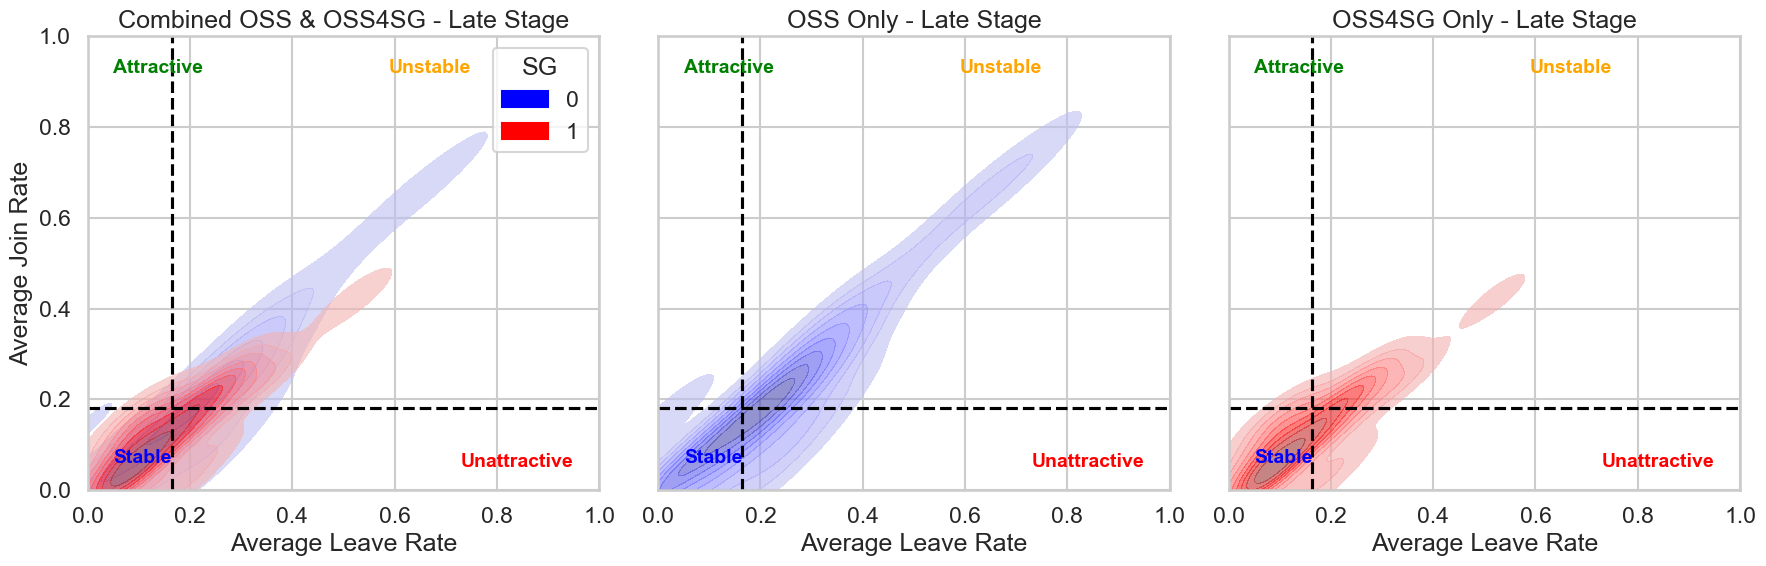

In [63]:
# Late Stage Plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Combined Data
sns.kdeplot(
    data=df_late,
    x='Average Leave Rate',
    y='Average Join Rate',
    hue='SG',
    palette=sg_palette,
    fill=True,
    alpha=0.6,
    thresh=0.05,
    levels=10,
    ax=axs[0]
)
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[0].set_title('Combined OSS & OSS4SG - Late Stage')
axs[0].set_xlabel('Average Leave Rate')
axs[0].set_ylabel('Average Join Rate')
add_quadrant_labels_and_lines(axs[0])

# OSS Only
sns.kdeplot(
    data=df_late[df_late['SG'] == 0],
    x='Average Leave Rate',
    y='Average Join Rate',
    color='blue',
    fill=True,
    alpha=0.6,
    thresh=0.05,
    levels=10,
    ax=axs[1]
)
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[1].set_title('OSS Only - Late Stage')
axs[1].set_xlabel('Average Leave Rate')
add_quadrant_labels_and_lines(axs[1], hide_legend=True)

# OSS4SG Only
sns.kdeplot(
    data=df_late[df_late['SG'] == 1],
    x='Average Leave Rate',
    y='Average Join Rate',
    color='red',
    fill=True,
    alpha=0.6,
    thresh=0.05,
    levels=10,
    ax=axs[2]
)
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)
axs[2].set_title('OSS4SG Only - Late Stage')
axs[2].set_xlabel('Average Leave Rate')
add_quadrant_labels_and_lines(axs[2])

plt.tight_layout()
plt.show()

# Comparing side-by-side Mid, Late, and Combined Mid & Late stages for OSS and OSS4SG projects.

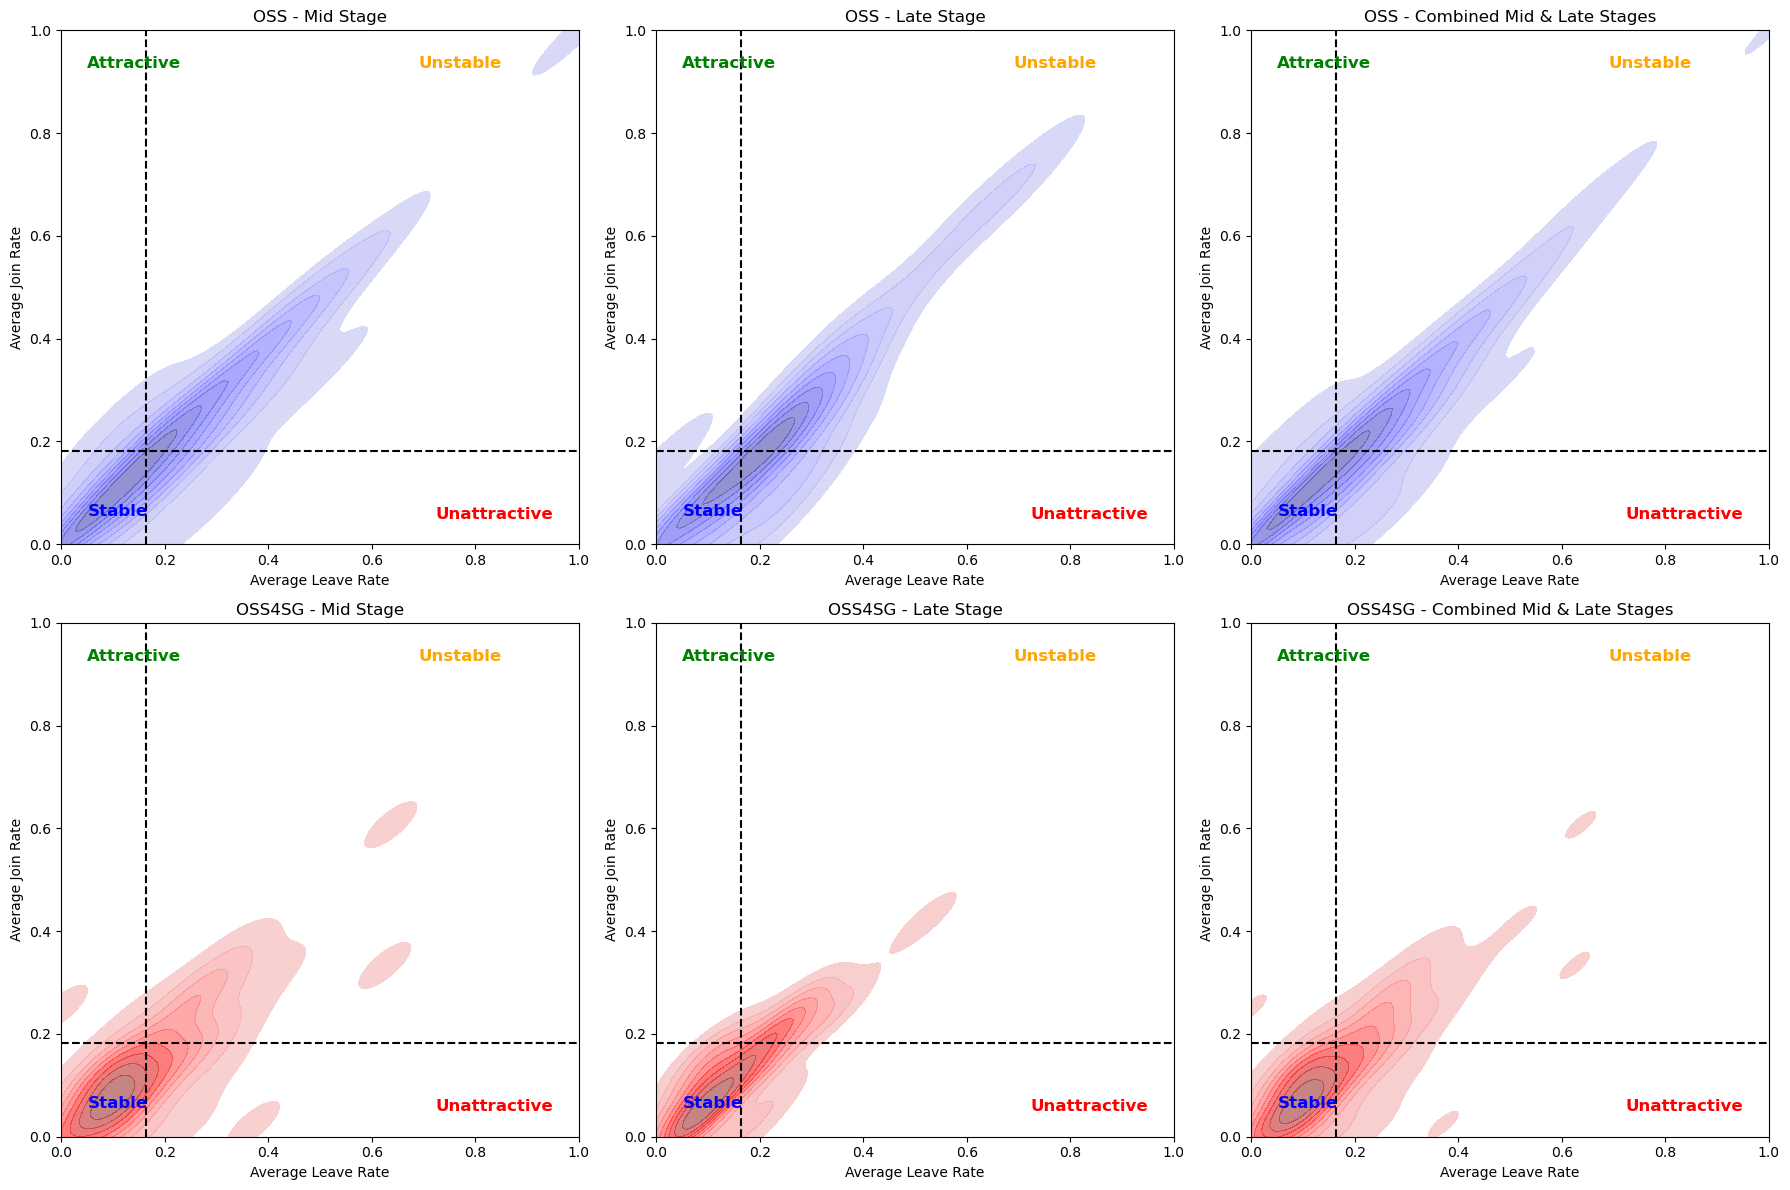

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df_mid = pd.read_csv('/Users/mohamadashraf/Downloads/OSS4SG_MSR-main-2/Datasets/GraphInfo/Join Rate vs Leave Rate for mid stages.csv')
df_late = pd.read_csv('/Users/mohamadashraf/Downloads/OSS4SG_MSR-main-2/Datasets/GraphInfo/Join Rate vs Leave Rate for late stages.csv')

# Combine Mid and Late stages
df_mid_late = pd.concat([df_mid, df_late], ignore_index=True)

# Define medians for the quadrants
join_rate_median = 0.182
leave_rate_median = 0.164

# Separate OSS and OSS4SG data
df_mid_oss = df_mid[df_mid['SG'] == 0]
df_mid_oss4sg = df_mid[df_mid['SG'] == 1]
df_late_oss = df_late[df_late['SG'] == 0]
df_late_oss4sg = df_late[df_late['SG'] == 1]
df_mid_late_oss = df_mid_late[df_mid_late['SG'] == 0]
df_mid_late_oss4sg = df_mid_late[df_mid_late['SG'] == 1]

# Function to plot data
def plot_stage_data(df, title, ax, color):
    sns.kdeplot(
        data=df,
        x='Average Leave Rate',
        y='Average Join Rate',
        color=color,
        fill=True,
        alpha=0.6,
        thresh=0.05,
        levels=10,
        ax=ax
    )
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(title)
    ax.set_xlabel('Average Leave Rate')
    ax.set_ylabel('Average Join Rate')
    ax.axhline(join_rate_median, color='black', linestyle='--')
    ax.axvline(leave_rate_median, color='black', linestyle='--')
    # Adjust quadrant label positions
    ax.text(0.05, 0.95, 'Attractive', transform=ax.transAxes, fontsize=12, color='green', fontweight='bold', verticalalignment='top')
    ax.text(0.95, 0.05, 'Unattractive', transform=ax.transAxes, fontsize=12, color='red', fontweight='bold', horizontalalignment='right')
    ax.text(0.05, 0.05, 'Stable', transform=ax.transAxes, fontsize=12, color='blue', fontweight='bold', verticalalignment='bottom')
    ax.text(0.85, 0.95, 'Unstable', transform=ax.transAxes, fontsize=12, color='orange', fontweight='bold', horizontalalignment='right', verticalalignment='top')

# Initialize the matplotlib figure with 2x3 subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Plot individual and combined stages for OSS (blue) and OSS4SG (red)
plot_stage_data(df_mid_oss, 'OSS - Mid Stage', axs[0, 0], 'blue')
plot_stage_data(df_late_oss, 'OSS - Late Stage', axs[0, 1], 'blue')
plot_stage_data(df_mid_late_oss, 'OSS - Combined Mid & Late Stages', axs[0, 2], 'blue')

plot_stage_data(df_mid_oss4sg, 'OSS4SG - Mid Stage', axs[1, 0], 'red')
plot_stage_data(df_late_oss4sg, 'OSS4SG - Late Stage', axs[1, 1], 'red')
plot_stage_data(df_mid_late_oss4sg, 'OSS4SG - Combined Mid & Late Stages', axs[1, 2], 'red')

plt.tight_layout()
plt.show()

### Test Results Summary using bonferroni correction

| **Test**                               | **Statistic** | **P-value**           | **Effect Size (r)**      | **Conclusion**                                                                 | **Effect Size Interpretation** |
|----------------------------------------|---------------|-----------------------|--------------------------|--------------------------------------------------------------------------------|--------------------------------|
| **Late Average Join Rates (Mann-Whitney)** | 522.5      | 0.11986               | -0.1819                   | Fail to reject the null hypothesis: No significant difference between groups   | Small                          |
| **Late Average Leave Rates (Mann-Whitney)** | 517.5      | 0.10750               | -0.1883                   | Fail to reject the null hypothesis: No significant difference between groups   | Small                          |

### RQ3
**How do contributors’ attraction and turnover evolve over time in OSS4SG projects compared to general OSS projects?**

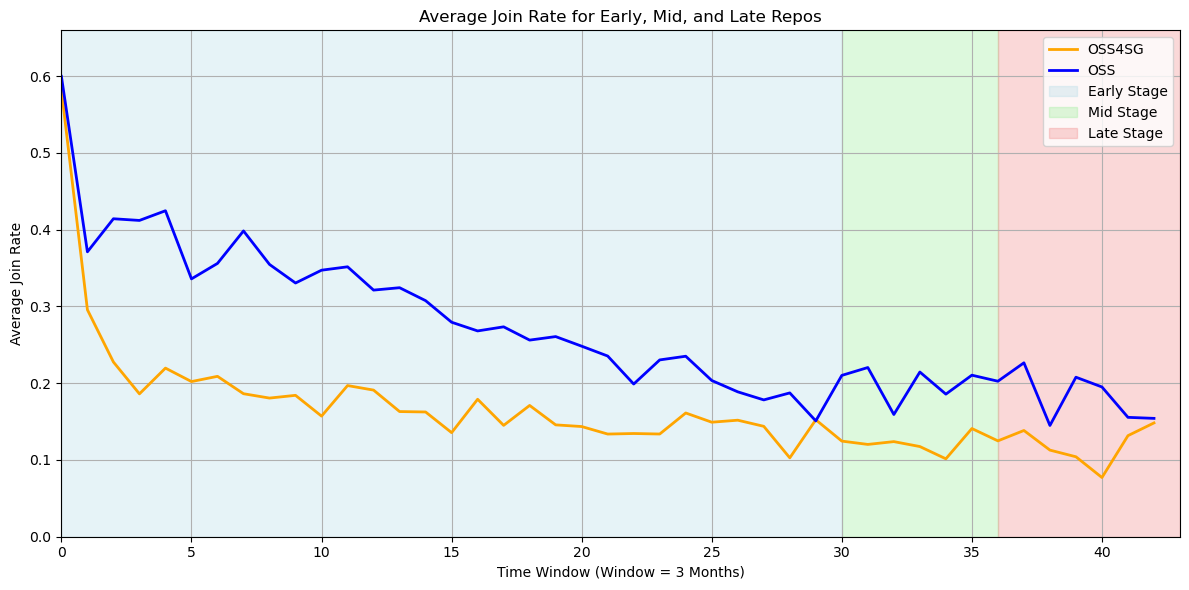

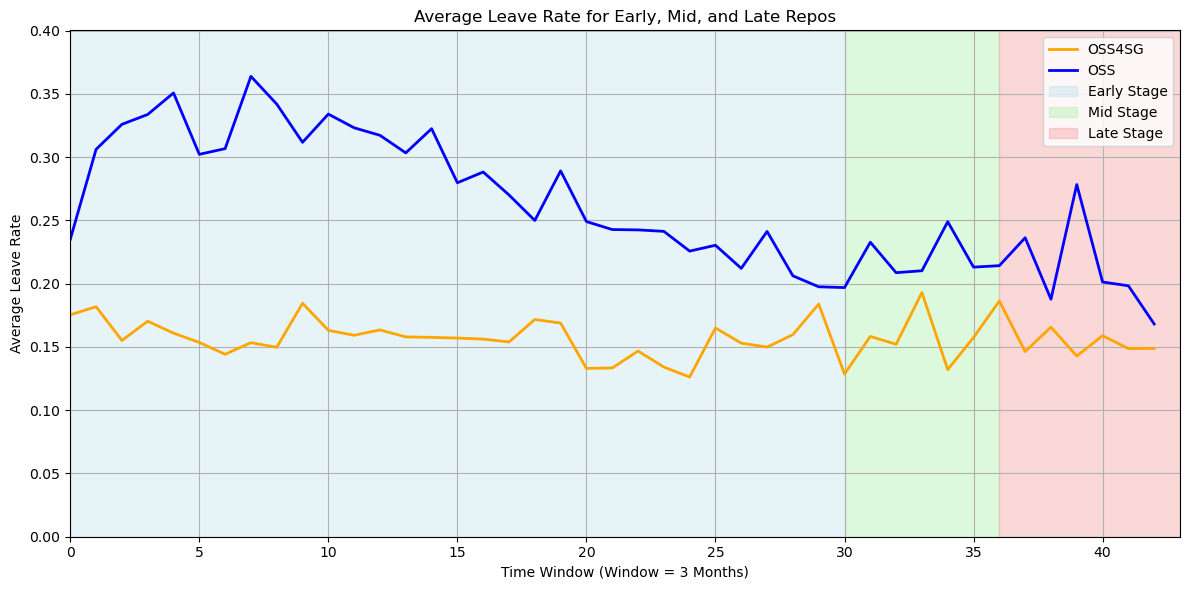

In [70]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set the directory where the CSV files are located
directory = '/Users/mohamadashraf/Downloads/OSS4SG_Classification-main-2/Datasets/GraphInfo/'

# File paths for Active Users, Join Rate, and Leave Rate SG and Not SG
active_users_files = [
    os.path.join(directory, 'Average Active Users for each window (Early Repos).csv'),
    os.path.join(directory, 'Average Active Users for each window (Mid Repos).csv'),
    os.path.join(directory, 'Average Active Users for each window (Late Repos).csv')
]

join_rate_files = [
    os.path.join(directory, 'Average Join Rate for each window (Early Repos).csv'),
    os.path.join(directory, 'Average Join Rate for each window (Mid Repos).csv'),
    os.path.join(directory, 'Average Join Rate for each window (Late Repos).csv')
]

leave_rate_files = [
    os.path.join(directory, 'Average Leave Rate for each window (Early Repos).csv'),
    os.path.join(directory, 'Average Leave Rate for each window (Mid Repos).csv'),
    os.path.join(directory, 'Average Leave Rate for each window (Late Repos).csv')
]

# Function to print column names of each file
def print_column_names(file_list):
    for file in file_list:
        df = pd.read_csv(file)
        print(f"Columns in {file}: {df.columns}")

# Print column names to identify the correct ones
#print_column_names(active_users_files)
#print_column_names(join_rate_files)
#print_column_names(leave_rate_files)

# Once you identify the correct column names, replace 'OSS4SG' and 'OSS' with the actual column names
# Assuming 'SG' and 'Not SG' are the correct column names from your previous context

# Function to load CSV and extract SG and Not SG columns
def load_and_concat(file_list):
    sg_data = []
    not_sg_data = []
    
    for file in file_list:
        df = pd.read_csv(file)
        sg_data.append(df['SG'])  # Using 'SG' as before
        not_sg_data.append(df['Not SG'])  # Using 'Not SG' as before
    
    # Concatenate data
    sg_concat = pd.concat(sg_data, axis=0, ignore_index=True)
    not_sg_concat = pd.concat(not_sg_data, axis=0, ignore_index=True)
    
    return sg_concat, not_sg_concat

# Function to plot concatenated data and save as high-resolution PDF
def plot_concatenated_with_shade(sg_data, not_sg_data, title, ylabel, stage_lengths, filename):
    plt.figure(figsize=(12, 6))

    x_values = range(len(sg_data))
    
    # Plot data
    plt.plot(x_values, sg_data, label='OSS4SG', color='orange', linewidth=2)  # Renamed label from 'SG' to 'OSS4SG'
    plt.plot(x_values, not_sg_data, label='OSS', color='blue', linewidth=2)  # Renamed 'Not SG' to 'OSS'

    # Add shaded areas for early, mid, and late stages
    early_end = stage_lengths[0]
    mid_end = early_end + stage_lengths[1]
    late_end = mid_end + stage_lengths[2]

    plt.axvspan(0, early_end, color='lightblue', alpha=0.3, label='Early Stage')
    plt.axvspan(early_end, mid_end, color='lightgreen', alpha=0.3, label='Mid Stage')
    plt.axvspan(mid_end, late_end, color='lightcoral', alpha=0.3, label='Late Stage')

    # Set titles, labels, and legend
    plt.title(title)
    plt.xlabel('Time Window (Window = 3 Months)')
    plt.ylabel(ylabel)
    plt.legend(loc='upper right')  # Changed legend to top-right corner
    plt.grid(True)

    # Set axis limits
    plt.xlim(0, len(sg_data))
    plt.ylim(0, max(max(sg_data), max(not_sg_data)) * 1.1)

    plt.tight_layout()

    
    # Create 'printed graphs' directory if it doesn't exist
    output_dir = 'printed graphs'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Save as high-resolution PDF
    plt.savefig(os.path.join(output_dir, filename), format='pdf', dpi=300)
    plt.show()

# Load and concatenate the data for SG and Not SG for all three metrics
sg_active_users, not_sg_active_users = load_and_concat(active_users_files)
sg_join_rate, not_sg_join_rate = load_and_concat(join_rate_files)
sg_leave_rate, not_sg_leave_rate = load_and_concat(leave_rate_files)

# Define the number of windows for each stage (early, mid, late)
early_stage_length = len(pd.read_csv(active_users_files[0]))
mid_stage_length = len(pd.read_csv(active_users_files[1]))
late_stage_length = len(pd.read_csv(active_users_files[2]))

# Plot the concatenated data with shaded stages and updated x-axis label for all three graphs

plot_concatenated_with_shade(
    sg_join_rate, 
    not_sg_join_rate, 
    'Average Join Rate for Early, Mid, and Late Repos', 
    'Average Join Rate', 
    [early_stage_length, mid_stage_length, late_stage_length],
    'join_rate.pdf'
)

plot_concatenated_with_shade(
    sg_leave_rate, 
    not_sg_leave_rate, 
    'Average Leave Rate for Early, Mid, and Late Repos', 
    'Average Leave Rate', 
    [early_stage_length, mid_stage_length, late_stage_length],
    'leave_rate.pdf'
)

### Definitions

<div style="background-color: #ffe6e6; padding: 10px; border-radius: 5px; font-size: 16px;">
    
- <strong style="color: #cc0000;">Join Date:</strong> For each contributor, the join date is defined as their first contribution to the repository.<br><br>

- <strong style="color: #cc0000;">Leave Date:</strong> A contributor’s leave date is considered as their last contribution date, but only if this date is more than 5 months ago. This threshold ensures that we account for contributors who might still be active and haven’t officially left the project.
</div>


### Key Takeaway

<div style="background-color: #e6f7ff; padding: 10px; border-radius: 5px; font-size: 16px;">
OSS4SG projects show greater stability in the early stage, with a lower leave rate, indicating contributors tend to stay longer. On the other hand, OSS projects are more attractive in the early stage, drawing in a higher number of contributors the mid stages, OSS4SG projects maintain higher stability</strong> 

***clustring using DTW***

Computing pairwise DTW distances...
Distance computation completed.


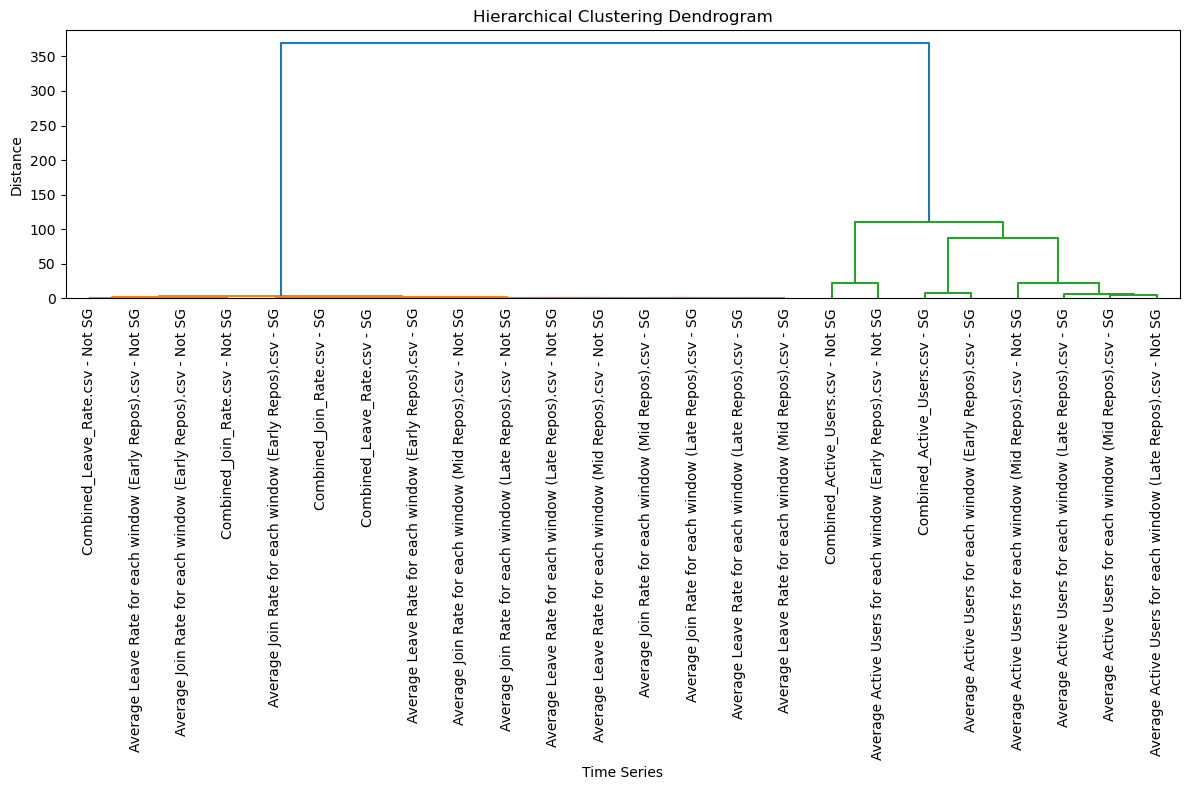

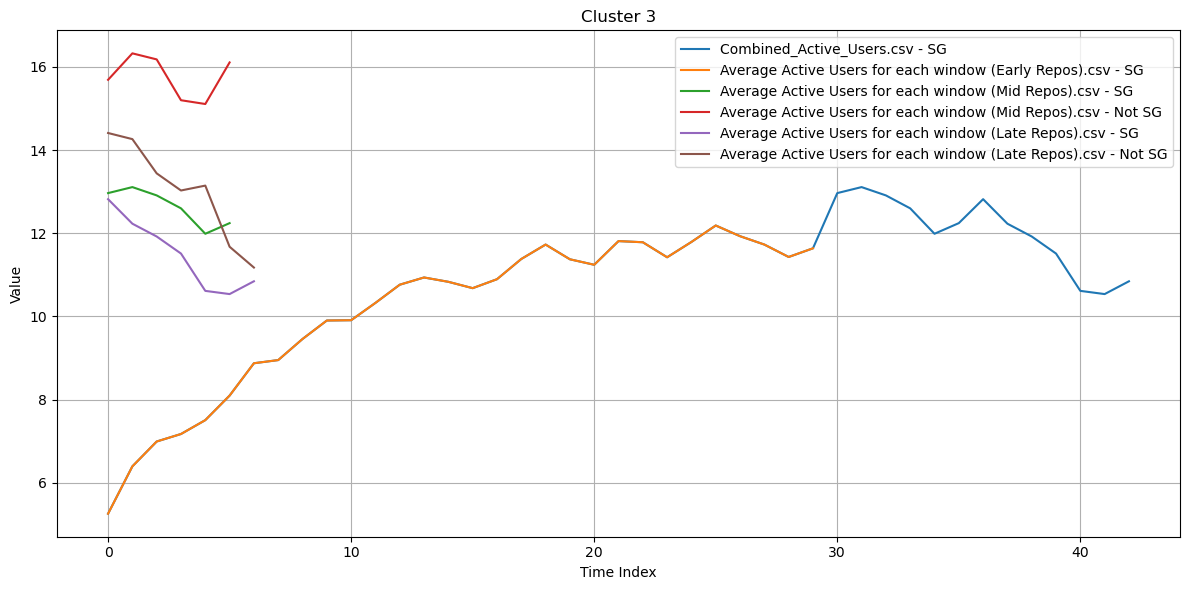

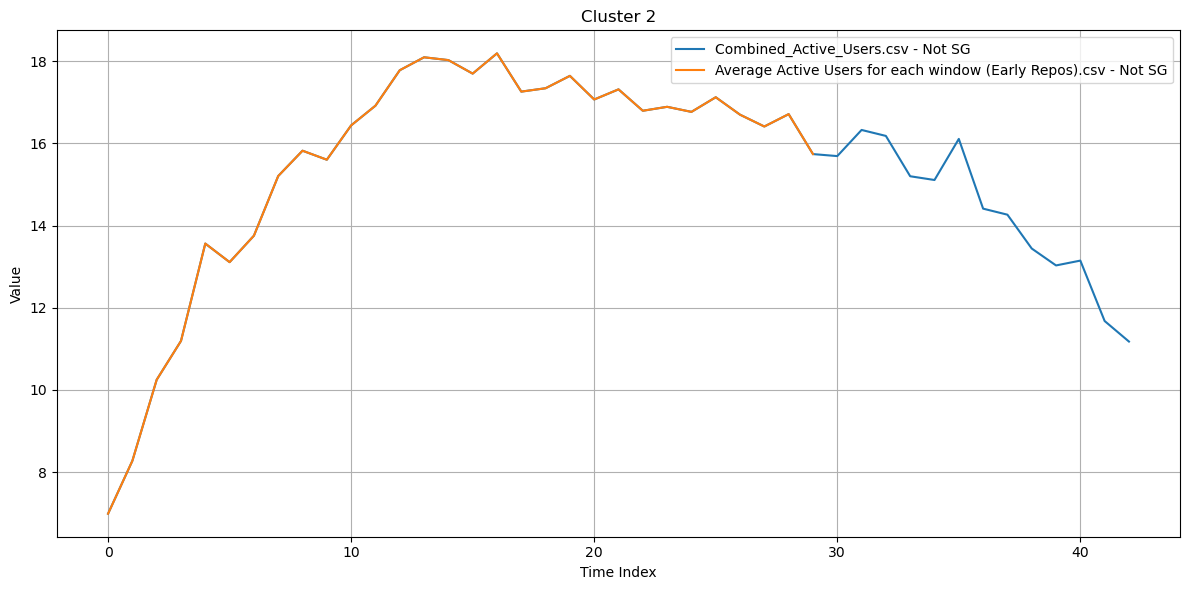

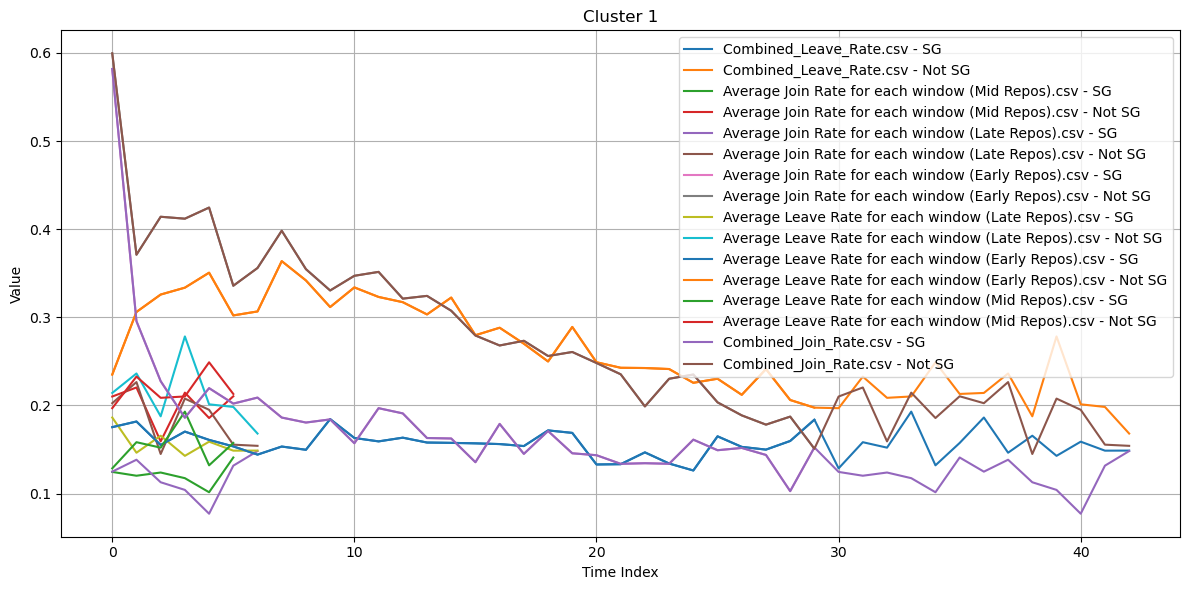

In [71]:
import os
import pandas as pd
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Step 1: Data Preparation
# Define the directory containing the CSV files
directory = '/Users/mohamadashraf/Downloads/OSS4SG_Classification-main-2/Datasets/GraphInfo'

# Get a list of CSV files in the directory
files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Initialize a list to hold all time series
time_series_list = []
series_labels = []

# Read each file and extract the time series
for filename in files:
    file_path = os.path.join(directory, filename)
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Extract 'SG' and 'Not SG' series
    sg_series = df['SG'].dropna().to_numpy()
    not_sg_series = df['Not SG'].dropna().to_numpy()
    
    # Add to the list with labels
    time_series_list.append(sg_series)
    series_labels.append(f"{filename} - SG")
    
    time_series_list.append(not_sg_series)
    series_labels.append(f"{filename} - Not SG")

# Step 2: Distance Computation
n = len(time_series_list)
distance_matrix = np.zeros((n, n))

print("Computing pairwise DTW distances...")
for i in range(n):
    for j in range(i + 1, n):
        distance, _ = fastdtw(time_series_list[i], time_series_list[j], dist=lambda x, y: euclidean([x], [y]))
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance  # Symmetric matrix
print("Distance computation completed.")

# Step 3: Clustering
# Convert the distance matrix to condensed form
condensed_distance = squareform(distance_matrix)

# Perform hierarchical clustering
Z = linkage(condensed_distance, method='average')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=series_labels, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Step 4: Extract Clusters
# Choose the number of clusters (you can adjust this)
num_clusters = 3
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Group series by cluster
cluster_dict = {}
for idx, cluster_id in enumerate(clusters):
    cluster_dict.setdefault(cluster_id, []).append((series_labels[idx], time_series_list[idx]))

# Step 5: Visualize Clusters
for cluster_id, series_list in cluster_dict.items():
    plt.figure(figsize=(12, 6))
    for label, series in series_list:
        plt.plot(series, label=label)
    plt.title(f"Cluster {cluster_id}")
    plt.xlabel('Time Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

### Test Results Summary using bonferroni correction

| **Test**                               | **Statistic** | **P-value**           | **Effect Size (r)**      | **Conclusion**                                                                 | **Effect Size Interpretation** |
|----------------------------------------|---------------|-----------------------|--------------------------|--------------------------------------------------------------------------------|--------------------------------|
| **Join Rates (Wilcoxon Test)**         | 7.0           | 2.16e-12              | -0.8586                   | Reject the null hypothesis: Significant difference between the two groups      | Large                          |
| **Leave Rates (Wilcoxon Test)**        | 3.0           | 5.68e-13              | -0.8656                   | Reject the null hypothesis: Significant difference between the two groups      | Large                          |
| **Average Join Rates (Mann-Whitney)**  | 2714.5        | 6.03e-09              | -0.3948                   | Reject the null hypothesis: Significant difference between the two groups      | Medium                         |
| **Average Leave Rates (Mann-Whitney)** | 2587.5        | 1.02e-09              | -0.4145                   | Reject the null hypothesis: Significant difference between the two groups      | Medium                         |
| **Early Join Rates (Wilcoxon Test)**   | 1.0           | 3.72e-09              | -0.8693                   | Reject the null hypothesis: Significant difference between the two groups      | Large                          |
| **Early Leave Rates (Wilcoxon Test)**  | 0.0           | 1.86e-09              | -0.8731                   | Reject the null hypothesis: Significant difference between the two groups      | Large                          |
| **Mid Join Rates (Wilcoxon Test)**     | 0.0           | 0.03125               | -0.8987                   | Reject the null hypothesis: Significant difference between the two groups      | Large                          |
| **Mid Leave Rates (Wilcoxon Test)**    | 0.0           | 0.03125               | -0.8987                   | Reject the null hypothesis: Significant difference between the two groups      | Large                          |
| **Late Join Rates (Wilcoxon Test)**    | 0.0           | 0.015625              | -0.8944                   | Reject the null hypothesis: Significant difference between the two groups      | Large                          |
| **Late Leave Rates (Wilcoxon Test)**   | 0.0           | 0.015625              | -0.8944                   | Reject the null hypothesis: Significant difference between the two groups      | Large                          |


### Test Definitions

| **Test Name**                         | **Description**                                                                                               |
|---------------------------------------|---------------------------------------------------------------------------------------------------------------|
| **Wilcoxon Test**                     | A non-parametric test used to compare two paired groups to assess whether their population mean ranks differ.  |
| **Mann-Whitney U Test**               | A non-parametric test used to compare differences between two independent groups when the data are not normally distributed. |
| **Join Rates**                        | Refers to the rate at which new contributors join the project during different life stages.                    |
| **Leave Rates**                       | Refers to the rate at which contributors leave or stop contributing to the project.                            |
| **Effect Size (r)**                   | A measure of the magnitude of difference between two groups. An effect size can be small, medium, or large.    |
| **P-value**                           | Represents the probability of obtaining test results at least as extreme as the ones observed, under the null hypothesis. |
| **Null Hypothesis**                   | The default hypothesis that there is no significant difference between the groups being tested.                |
| **Reject the Null Hypothesis**        | Indicates that the data provide sufficient evidence to conclude that there is a significant difference between the groups. |
| **Early/Mid/Late Join/Leave Rates**   | Refers to the contribution activity during the early, mid, and late stages of a project's lifecycle.           |
| **Average Join/Leave Rates**          | The overall rate of contributors joining or leaving across the project timeline, as assessed through scatterplots. |

### OSS4SG Classification - Data Overview

#### Contributor Groups and Quartiles

| **Group**        | **Total Repos** | **SG Repos** | **Non-SG Repos** |
|------------------|-----------------|--------------|------------------|
| **First Group**   | 72              | 54           | 18               |
| **Second Group**  | 72              | 54           | 18               |
| **Third Group**   | 72              | 51           | 21               |
| **Fourth Group**  | 73              | 39           | 34               |

| **Quartile**            | **Length**   |
|-------------------------|--------------|
| **First Quartile**       | 7.526       |
| **Second Quartile**      | 9.153       |
| **Third Quartile**       | 11.063      |

#### Stage Lengths

| **Stage**       | **Length**       |
|-----------------|------------------|
| **Early Stage**  | 7.526            |
| **Middle Stage** | 1.627            |
| **Late Stage**   | 1.910            |

---

### Early Stage Analysis

| **Metric**                                    | **Total Repos** | **SG Repos** | **Non-SG Repos** |
|-----------------------------------------------|-----------------|--------------|------------------|
| **Number of Repos with Stage**                | 217             | 144          | 73               |
| **Average Contributors per Repo**             | 61.90           | 53.17        | 80.90            |
| **Average One-Time Contributors per Repo**    | 34.07           | 21.10        | 62.29            |

---

### Mid Stage Analysis

| **Metric**                                    | **Total Repos** | **SG Repos** | **Non-SG Repos** |
|-----------------------------------------------|-----------------|--------------|------------------|
| **Number of Repos with Stage**                | 145             | 90           | 55               |
| **Average Contributors per Repo**             | 61.90           | 53.17        | 80.90            |
| **Average One-Time Contributors per Repo**    | 34.07           | 21.10        | 62.29            |

---

### Late Stage Analysis

| **Metric**                                    | **Total Repos** | **SG Repos** | **Non-SG Repos** |
|-----------------------------------------------|-----------------|--------------|------------------|
| **Number of Repos with Stage**                | 73              | 39           | 34               |
| **Average Contributors per Repo**             | 85.74           | 79.0         | 93.47            |
| **Average One-Time Contributors per Repo**    | 59.56           | 37.92        | 84.38            |

---

### Grouped Stages (All Stages Combined)

| **Group**        | **Total Repos** | **SG Repos** | **Non-SG Repos** |
|------------------|-----------------|--------------|------------------|
| **First Group**   | 72              | 54           | 18               |
| **Second Group**  | 72              | 51           | 21               |
| **Third Group**   | 73              | 39           | 34               |

| **Metric**                                      | **First Group** | **Second Group** | **Third Group**  |
|-------------------------------------------------|-----------------|------------------|------------------|
| **Average Contributors per Repo**               | 59.79           | 60.33            | 85.74            |
| **Average One-Time Contributors per Repo**      | 27.13           | 24.81            | 59.56            |

---

### Key Metrics and Results

#### Median Join and Leave Rates
- **Join Rate Median**: 0.135
- **Leave Rate Median**: 0.121

#### SG Project Percentages (by Group)

| **Attribute**    | **Early Stage** | **Mid Stage** | **Late Stage** |
|------------------|-----------------|---------------|----------------|
| **Attractive**   | 4.2%            | 15.6%         | 17.9%          |
| **Unstable**     | 38.2%           | 32.2%         | 38.5%          |
| **Stable**       | 52.1%           | 33.3%         | 35.9%          |
| **Unattractive** | 5.6%            | 18.9%         | 7.7%           |

#### Non-SG Project Percentages (by Group)

| **Attribute**    | **Early Stage** | **Mid Stage** | **Late Stage** |
|------------------|-----------------|---------------|----------------|
| **Attractive**   | 11.0%           | 14.5%         | 5.9%           |
| **Unstable**     | 54.8%           | 41.8%         | 41.2%          |
| **Stable**       | 26.0%           | 34.5%         | 38.2%          |
| **Unattractive** | 8.2%            | 9.1%          | 14.7%          |